# Credit Card Attrition
The goal is to determine the factors that drive credit card attrition, as well as what factors influence churn more than others.

# Import and Formatting

## Import Libraries

In [1]:
## CHECK for installed packages
# ! pip list

# INSTALL packages
# ! pip install ________

# IMPORT needed libraries 
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import stats
import more_itertools as mit
from statsmodels.stats import weightstats as stests
import math

# SUPPRESS warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Formatting

In [2]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 25)
pd.set_option('display.width', 150)

# Dataset Import and Preparation

### Kaggle location:
https://www.kaggle.com/sakshigoyal7/credit-card-customers



---



### GitHub repository: 
https://github.com/RobertAlber/Credit_Card_Customer_Attrition



---



### BankChurners csv: 
https://raw.githubusercontent.com/RobertAlber/Credit_Card_Customer_Attrition/main/BankChurners.csv


## View Raw Data

In [3]:
# IMPORT data from GitHub
cc_raw = pd.read_csv('https://raw.githubusercontent.com/RobertAlber/Credit_Card_Customer_Attrition/main/BankChurners.csv')

# SET option to reduce column truncation
pd.set_option('display.max_columns', None)

# PRINT
cc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

## Data Preparation

1. Dropping of irrelivant columns (21, 22)
2. Renaming of columns for consistency
3. Define new parent DataFrame
4. Conversion of 'Attrition_Flag' to binary
  1. Conversion of 'Attrition_Flag' from objects to int
5. Renaming 'M/F' to 'Male/Female'
6. Defining the function for referencing column name throughout the file

In [4]:
# drop the last two rows from raw data
cc_drop = cc_raw.drop(cc_raw.columns[[21, 22]], axis=1)


# RENAME columns
cc_col_rename = cc_drop.rename(columns={'CLIENTNUM': 'Customer_ID', 'Sex': 'Gender', 'Dependent_count': 'Dependent_Count', 'Months_on_book': 'Months_On_Book', 'Months_Inactive_12_mon': 'Months_Inactive_12_Mon', 'Contacts_Count_12_mon': 'Contacts_Count_12_Mon'})


# DEFINE parent DataFrame
df_cc = cc_col_rename


# DEFINE function for adding Attrition_Status column
def func(row):
  if row['Attrition_Flag'] == 'Attrited Customer':
    val = 1
  elif row['Attrition_Flag'] == 'Existing Customer':
    val = 0
  return val
# ADD column
df_cc['Attrition_Status'] = df_cc.apply(func, axis=1)
# MOVE column
cols = df_cc.columns.tolist() # list of columns
cols.insert(2, cols.pop(cols.index('Attrition_Status')))
df_cc = df_cc.reindex(columns = cols)


# DEFINE function for updating Gender column
def func2(row):
  if row['Gender'] == 'M':
    val = 'Male'
  elif row['Gender'] == 'F':
    val = 'Female'
  return val
# ADD column
df_cc['Gender'] = df_cc.apply(func2, axis=1)
# MOVE column
cols = df_cc.columns.tolist() # list of columns
cols.insert(2, cols.pop(cols.index('Gender')))
df_cc = df_cc.reindex(columns = cols)




## DEFINE FUNCTION for defining column name in functional programming
def colname():
   x = column_name
   return x


# PRINT
df_cc.info()
df_cc.head(3)



##################################################
## TESTING PREP
df_cc_attrited = df_cc.loc[df_cc['Attrition_Flag'] == 'Attrited Customer']
df_cc_existing = df_cc.loc[df_cc['Attrition_Flag'] == 'Existing Customer']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Gender                    10127 non-null  object 
 3   Attrition_Status          10127 non-null  int64  
 4   Customer_Age              10127 non-null  int64  
 5   Dependent_Count           10127 non-null  int64  
 6   Education_Level           10127 non-null  object 
 7   Marital_Status            10127 non-null  object 
 8   Income_Category           10127 non-null  object 
 9   Card_Category             10127 non-null  object 
 10  Months_On_Book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_Mon    10127 non-null  int64  
 13  Contacts_Count_12_Mon     10127 non-null  int64  
 14  Credit

# Analysis
Analysis is started by calculating the attrition percentage by column by unique variable or by variable group for those such as age (25-39) for example.  

## Attrition Percentage
Calculation of attrition percentage by category, by group, to determine which variables more strongly drive attrition. For example, Gender would be broken down by Male and Female to see if there is a significant difference in attrition rate. 

### Analysis by Column
Each cell contains a breakdown by variable/group, which include 'Total Customers', 'Attrited Customers', 'Existing Customers', and 'Attrition Percent'. 

Each cell displays a crosstab, which is also converted back to a dataframe for further analysis.  

#### Overall

In [5]:
# OVERALL
## Overall attrition percentage for all customers


## GROUPING
## CREATE groups
overall = pd.cut(df_cc['Customer_ID'], 
                 bins=1, 
                 labels=['All Customers'])

## CREATE crosstab
cross_overall = pd.crosstab(overall, df_cc['Attrition_Flag'])


## CALCULATE total customers by category
cross_overall['Total Customers'] = (cross_overall['Attrited Customer'] + 
                                    cross_overall['Existing Customer'])
## MOVE column total customers by category
cols = cross_overall.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total Customers')))
cross_overall = cross_overall.reindex(columns = cols)

## CALCULATE attrition rate
cross_overall['Attrition Percentage'] = round(((cross_overall['Attrited Customer'] / 
                                                cross_overall['Total Customers']) * 100), 2)


## PRINT
cross_overall

Attrition_Flag,Total Customers,Attrited Customer,Existing Customer,Attrition Percentage
Customer_ID,,,,
All Customers,10127,1627,8500,16.07


#### Customer_Age

In [6]:
# PREVIEW DATA

## DEFINE
column_name = 'Customer_Age'
no_bins = 4


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Customer_Age,,,,
"(25.953, 37.75]",1400,183,1217,13.07
"(37.75, 49.5]",5197,867,4330,16.68
"(49.5, 61.25]",3218,536,2682,16.66
"(61.25, 73.0]",312,41,271,13.14


Customer Age


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Customer_Age,,,,
25-29,265,32,233,12.08
30-39,2132,310,1822,14.54
40-49,4652,779,3873,16.75
50-59,2673,448,2225,16.76
60+,405,58,347,14.32


<Figure size 576x576 with 0 Axes>

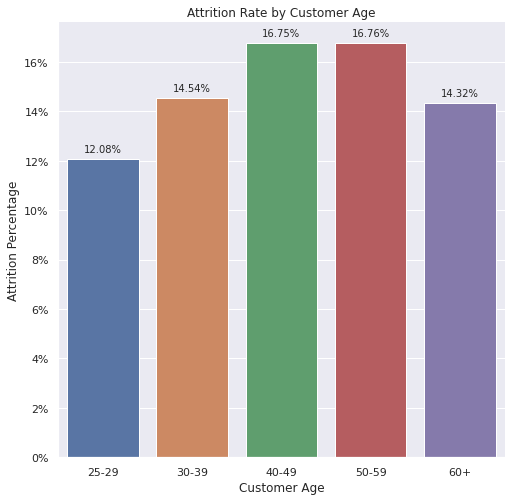

Customer Age


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Customer_Age,,,,
Younger than 45,4661,728,3933,15.62
45 or older,5466,899,4567,16.45


<Figure size 288x576 with 0 Axes>

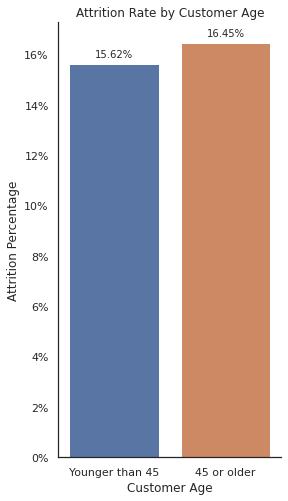

Customer Age

Z-Test Result:
The p-value for 'Customer Age' is 0.232, therefore we can ACCEPT the null hypothesis.

Mean:
The average 'Customer Age' for Existing Customers is 46.26.
The average 'Customer Age' for Attrited Customers is 46.66.

T-Test Result:
The p-value for 'Customer Age' is 0.067, therefore we can ACCEPT the null hypothesis.


In [7]:
# Customer_Age
### age of customer


##################################################
## DEFINE
### column name being references
column_name = 'Customer_Age'

### GROUPS for 3+ groups
group_bins = [-np.inf,
              30,
              40,
              50,
              60,
              np.inf]
group_labels = ['25-29',
                '30-39',
                '40-49',
                '50-59',
                '60+']

### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 45
value2 = 45
group_bins2 = [-np.inf,
               45,
               np.inf]
#### names for groups
group_labels2 = ['Younger than 45', 
                 '45 or older']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] < value1]
Group_B = df_cc.loc[df_cc[colname()] >= value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Customer_Age = pv
## DEFINE
### dataframe for concatented range table
concat_Customer_Age = df

#### Gender

Gender


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Gender,,,,
Female,5358,930,4428,17.36
Male,4769,697,4072,14.62


<Figure size 288x576 with 0 Axes>

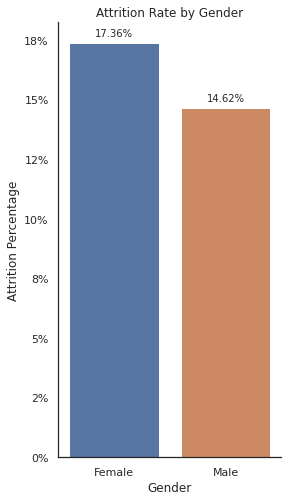

Gender

Z-Test Result:
The p-value for 'Gender' is 0.023, therefore we can REJECT the null hypothesis.


In [8]:
# Gender
### gender of customer


##################################################
## DEFINE
### column name being references
column_name = 'Gender'


### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 'Male'
value2 = 'Female'
groups = df_cc[colname()]
groups2 = df_cc[colname()]


############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] <= value1]
Group_B = df_cc.loc[df_cc[colname()] > value2]



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Gender = pv
## DEFINE
### dataframe for concatented range table
concat_Gender = df

#### Dependents_Count

In [9]:
# PREVIEW DATA

## DEFINE
column_name = 'Dependent_Count'
no_bins = 4


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Dependent_Count,,,,
"(-0.005, 1.25]",2742,404,2338,14.73
"(1.25, 2.5]",2655,417,2238,15.71
"(2.5, 3.75]",2732,482,2250,17.64
"(3.75, 5.0]",1998,324,1674,16.22


Dependent Count


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Dependent_Count,,,,
0,904,135,769,14.93
1,1838,269,1569,14.64
2,2655,417,2238,15.71
3,2732,482,2250,17.64
4,1574,260,1314,16.52
5,424,64,360,15.09


<Figure size 576x576 with 0 Axes>

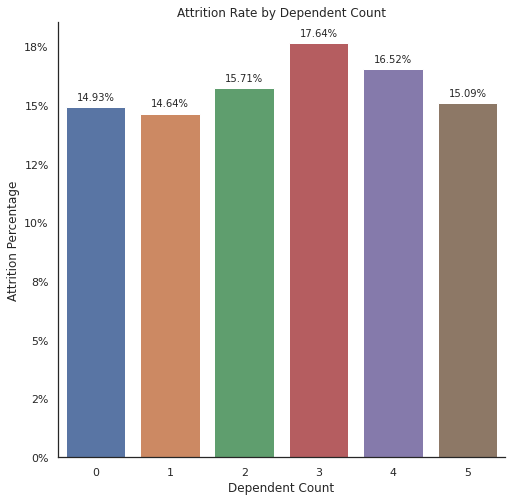

Dependent Count


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Dependent_Count,,,,
2 or fewer,5397,821,4576,15.21
2 or more,4730,806,3924,17.04


<Figure size 288x576 with 0 Axes>

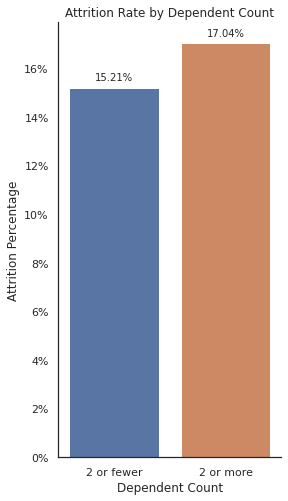

Dependent Count

Z-Test Result:
The p-value for 'Dependent Count' is 0.012, therefore we can REJECT the null hypothesis.

Mean:
The average 'Dependent Count' for Existing Customers is 2.34.
The average 'Dependent Count' for Attrited Customers is 2.40.

T-Test Result:
The p-value for 'Dependent Count' is 0.056, therefore we can ACCEPT the null hypothesis.


In [10]:
# Dependent_Count
### number of dependents the customer has


##################################################
## DEFINE
### column name being references
column_name = 'Dependent_Count'


### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 2
value2 = 2
group_bins2 = [-np.inf,
               2,
               np.inf]
#### names for groups
group_labels2 = ['2 or fewer', 
                 '2 or more']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = df_cc[colname()]

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] <= value1]
Group_B = df_cc.loc[df_cc[colname()] > value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Dependent_Count = pv
## DEFINE
### dataframe for concatented range table
concat_Dependent_Count = df

#### Education_Level

In [11]:
# PREVIEW DATA

## DEFINE
column_name = 'Education_Level'


## GROUPING
## CONVERT objects to numeric values
df_cc.Education_Level[df_cc.Education_Level == 'Uneducated'] = 0
df_cc.Education_Level[df_cc.Education_Level == 'High School'] = 1
df_cc.Education_Level[df_cc.Education_Level == 'College'] = 2
df_cc.Education_Level[df_cc.Education_Level == 'Graduate'] = 3
df_cc.Education_Level[df_cc.Education_Level == 'Post-Graduate'] = 4
df_cc.Education_Level[df_cc.Education_Level == 'Doctorate'] = 5
df_cc.Education_Level[df_cc.Education_Level == 'Unknown'] = 6
## CONVERT Attrition_Flag from object to int
df_cc[colname()] = df_cc[colname()].astype(str).astype(int)
## CREATE groups
groups = pd.cut(df_cc[colname()], 
                         bins=[-np.inf,0,1,2,3,4,5,np.inf], 
                         labels=['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate','Unknown'])
## CREATE crosstab
ctab_group = pd.crosstab(groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_group['Total_Customers'] = (ctab_group['Attrited Customer'] + 
                                      ctab_group['Existing Customer'])
## MOVE column total customers by category
cols = ctab_group.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_group = ctab_group.reindex(columns = cols)
## CALCULATE attrition rate
ctab_group['Attrition_Percent'] = round(((ctab_group['Attrited Customer'] / 
                                               ctab_group['Total_Customers']) * 100), 2)
## RENAME Attrited Customer and Existing Customer
ctab_group = ctab_group.rename(columns={'Attrited Customer': 'Attrited_Customers', 'Existing Customer': 'Existing_Customers'})
ctab_group

Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Education_Level,,,,
Uneducated,1487,237,1250,15.94
High School,2013,306,1707,15.20
College,1013,154,859,15.20
Graduate,3128,487,2641,15.57
Post-Graduate,516,92,424,17.83
Doctorate,451,95,356,21.06
Unknown,1519,256,1263,16.85


Education Level


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Education_Level,,,,
Uneducated,1487,237,1250,15.94
High School,2013,306,1707,15.20
College,1013,154,859,15.20
Graduate,3128,487,2641,15.57
Post-Graduate,516,92,424,17.83
Doctorate,451,95,356,21.06
Unknown,1519,256,1263,16.85


<Figure size 576x576 with 0 Axes>

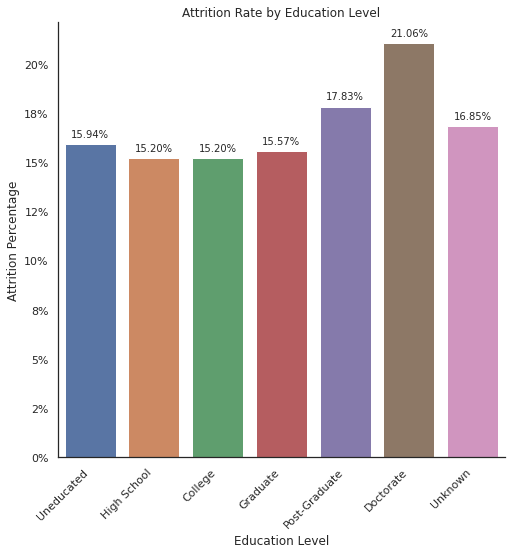

Education Level


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Education_Level,,,,
College or less,4513,697,3816,15.44
Graduate or higher,4095,674,3421,16.46


<Figure size 288x576 with 0 Axes>

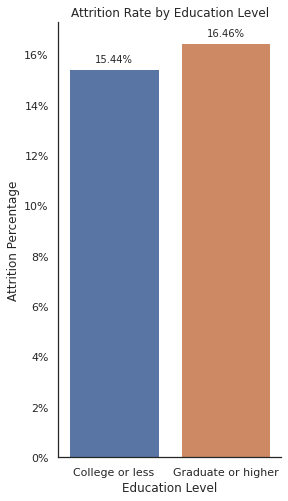

Education Level

Z-Test Result:
The p-value for 'Education Level' is 0.263, therefore we can ACCEPT the null hypothesis.


In [12]:
# Education_Level
### highest level of education achieved by the customer


##################################################
## DEFINE
### column name being references
column_name = 'Education_Level'



##################################################
## GROUPING
## CONVERT objects to numeric values
df_cc.Education_Level[df_cc.Education_Level == 'Uneducated'] = 0
df_cc.Education_Level[df_cc.Education_Level == 'High School'] = 1
df_cc.Education_Level[df_cc.Education_Level == 'College'] = 2
df_cc.Education_Level[df_cc.Education_Level == 'Graduate'] = 3
df_cc.Education_Level[df_cc.Education_Level == 'Post-Graduate'] = 4
df_cc.Education_Level[df_cc.Education_Level == 'Doctorate'] = 5
df_cc.Education_Level[df_cc.Education_Level == 'Unknown'] = 6
## CONVERT Attrition_Flag from object to int
df_cc[colname()] = df_cc[colname()].astype(str).astype(int)



##################################################
### GROUPS for 3+ groups
group_bins = [-np.inf,
              0,
              1,
              2,
              3,
              4,
              5,
              np.inf]
group_labels = ['Uneducated',
                'High School',
                'College',
                'Graduate',
                'Post-Graduate',
                'Doctorate',
                'Unknown']


### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 2
value2 = 2
group_bins2 = [-np.inf,
               2,
               5]
#### names for groups
group_labels2 = ['College or less', 
                 'Graduate or higher']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] < value1]
Group_B = df_cc.loc[(df_cc[colname()] > value2) & (df_cc[colname()] < 6)]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Education_Level = pv
## DEFINE
### dataframe for concatented range table
concat_Education_Level = df

#### Marital_Status

In [13]:
# PREVIEW DATA

## DEFINE
column_name = 'Marital_Status'


## GROUPING
## CONVERT objects to numeric values
df_cc.Marital_Status[df_cc.Marital_Status == 'Single'] = 0
df_cc.Marital_Status[df_cc.Marital_Status == 'Married'] = 1
df_cc.Marital_Status[df_cc.Marital_Status == 'Divorced'] = 2
df_cc.Marital_Status[df_cc.Marital_Status == 'Unknown'] = 3
## CONVERT Attrition_Flag from object to int
df_cc[colname()] = df_cc[colname()].astype(str).astype(int)
## CREATE groups
groups = pd.cut(df_cc[colname()], 
                       bins=[-np.inf,0,1,2,np.inf], 
                       labels=['Single','Married','Divorced','Unknown'])
## CREATE crosstab
ctab_group = pd.crosstab(groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_group['Total_Customers'] = (ctab_group['Attrited Customer'] + 
                                      ctab_group['Existing Customer'])
## MOVE column total customers by category
cols = ctab_group.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_group = ctab_group.reindex(columns = cols)
## CALCULATE attrition rate
ctab_group['Attrition_Percent'] = round(((ctab_group['Attrited Customer'] / 
                                               ctab_group['Total_Customers']) * 100), 2)
## RENAME Attrited Customer and Existing Customer
ctab_group = ctab_group.rename(columns={'Attrited Customer': 'Attrited_Customers', 'Existing Customer': 'Existing_Customers'})
ctab_group

Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Marital_Status,,,,
Single,3943,668,3275,16.94
Married,4687,709,3978,15.13
Divorced,748,121,627,16.18
Unknown,749,129,620,17.22


Marital Status


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Marital_Status,,,,
Single,3943,668,3275,16.94
Married,4687,709,3978,15.13
Divorced,748,121,627,16.18
Unknown,749,129,620,17.22


<Figure size 576x576 with 0 Axes>

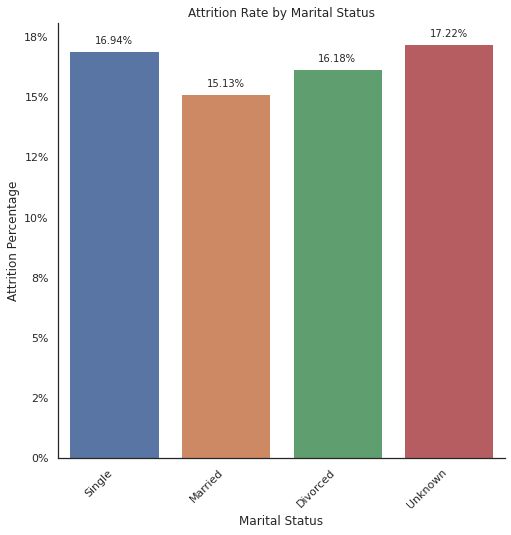

Marital Status


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Marital_Status,,,,
Single,3943,668,3275,16.94
Married,4687,709,3978,15.13


<Figure size 288x576 with 0 Axes>

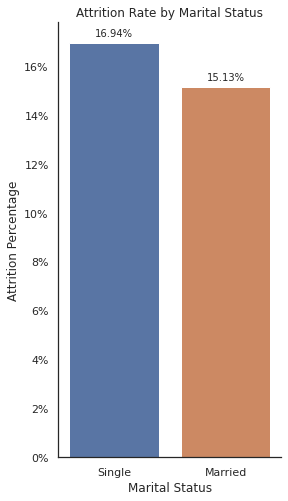

Marital Status

Z-Test Result:
The p-value for 'Marital Status' is 0.022, therefore we can REJECT the null hypothesis.


In [14]:
# Marital_Status
### current marital status


##################################################
## DEFINE
### column name being references
column_name = 'Marital_Status'



##################################################
## GROUPING
## CONVERT objects to numeric values
df_cc.Marital_Status[df_cc.Marital_Status == 'Single'] = 0
df_cc.Marital_Status[df_cc.Marital_Status == 'Married'] = 1
df_cc.Marital_Status[df_cc.Marital_Status == 'Divorced'] = 2
df_cc.Marital_Status[df_cc.Marital_Status == 'Unknown'] = 3
## CONVERT Attrition_Flag from object to int
df_cc[colname()] = df_cc[colname()].astype(str).astype(int)



##################################################
### GROUPS for 3+ groups
group_bins = [-np.inf,
              0,
              1,
              2,
              np.inf]
group_labels = ['Single',
                'Married',
                'Divorced',
                'Unknown']


### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 0
value2 = 1
group_bins2 = [-np.inf,
               0,
               1]
#### names for groups
group_labels2 = ['Single', 
                 'Married']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] == value1]
Group_B = df_cc.loc[df_cc[colname()] == value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Marital_Status = pv
## DEFINE
### dataframe for concatented range table
concat_Marital_Status = df

#### Income_Category

In [15]:
# PREVIEW DATA

## DEFINE
column_name = 'Income_Category'


## GROUPING
## CONVERT Card_Category objects to numeric values
df_cc.Income_Category[df_cc.Income_Category == 'Less than $40K'] = 0
df_cc.Income_Category[df_cc.Income_Category == '$40K - $60K'] = 1
df_cc.Income_Category[df_cc.Income_Category == '$60K - $80K'] = 2
df_cc.Income_Category[df_cc.Income_Category == '$80K - $120K'] = 3
df_cc.Income_Category[df_cc.Income_Category == '$120K +'] = 4
df_cc.Income_Category[df_cc.Income_Category == 'Unknown'] = 5
## CONVERT Attrition_Flag from object to int
df_cc[colname()] = df_cc[colname()].astype(str).astype(int)
## CREATE groups
groups = pd.cut(df_cc[colname()], 
                      bins=[-np.inf,0,1,2,3,4,np.inf], 
                      labels=['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown'])
## CREATE crosstab
ctab_group = pd.crosstab(groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_group['Total_Customers'] = (ctab_group['Attrited Customer'] + 
                                      ctab_group['Existing Customer'])
## MOVE column total customers by category
cols = ctab_group.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_group = ctab_group.reindex(columns = cols)
## CALCULATE attrition rate
ctab_group['Attrition_Percent'] = round(((ctab_group['Attrited Customer'] / 
                                               ctab_group['Total_Customers']) * 100), 2)
## RENAME Attrited Customer and Existing Customer
ctab_group = ctab_group.rename(columns={'Attrited Customer': 'Attrited_Customers', 'Existing Customer': 'Existing_Customers'})
ctab_group

Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Income_Category,,,,
Less than $40K,3561,612,2949,17.19
$40K - $60K,1790,271,1519,15.14
$60K - $80K,1402,189,1213,13.48
$80K - $120K,1535,242,1293,15.77
$120K +,727,126,601,17.33
Unknown,1112,187,925,16.82


Income Category


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Income_Category,,,,
Less than $40K,3561,612,2949,17.19
$40K - $60K,1790,271,1519,15.14
$60K - $80K,1402,189,1213,13.48
80K - $120K,1535,242,1293,15.77
>$120K,727,126,601,17.33
Unknown,1112,187,925,16.82


<Figure size 576x576 with 0 Axes>

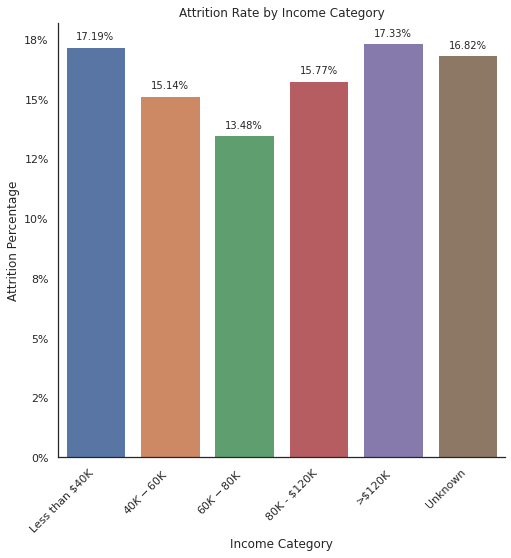

Income Category


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Income_Category,,,,
Less than $60k,5351,883,4468,16.5
$60k or more,3664,557,3107,15.2


<Figure size 288x576 with 0 Axes>

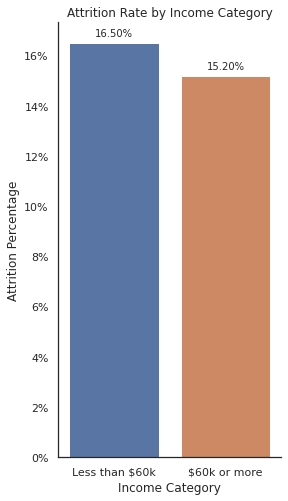

Income Category

Z-Test Result:
The p-value for 'Income Category' is 0.057, therefore we can ACCEPT the null hypothesis.


In [16]:
# Income_Category
### current income level


##################################################
## DEFINE
### column name being references
column_name = 'Income_Category'



##################################################
## GROUPING
## CONVERT Card_Category objects to numeric values
df_cc.Income_Category[df_cc.Income_Category == 'Less than $40K'] = 0
df_cc.Income_Category[df_cc.Income_Category == '$40K - $60K'] = 1
df_cc.Income_Category[df_cc.Income_Category == '$60K - $80K'] = 2
df_cc.Income_Category[df_cc.Income_Category == '$80K - $120K'] = 3
df_cc.Income_Category[df_cc.Income_Category == '>$120K'] = 4
df_cc.Income_Category[df_cc.Income_Category == 'Unknown'] = 5
## CONVERT Attrition_Flag from object to int
df_cc[colname()] = df_cc[colname()].astype(str).astype(int)



##################################################
### GROUPS for 3+ groups
group_bins = [-np.inf,
              0,
              1,
              2,
              3,
              4,
              np.inf]
group_labels = ['Less than $40K',
                '$40K - $60K',
                '$60K - $80K',
                '80K - $120K',
                '>$120K',
                'Unknown']


### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 0
value2 = 1
group_bins2 = [-np.inf,
               1,
               4]
#### names for groups
group_labels2 = ['Less than $60k', 
                 '$60k or more']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] == value1]
Group_B = df_cc.loc[df_cc[colname()] == value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Income_Category = pv
## DEFINE
### dataframe for concatented range table
concat_Income_Category = df

#### Card_Category

In [17]:
# PREVIEW DATA

## DEFINE
column_name = 'Card_Category'


## GROUPING
## CONVERT Card_Category objects to numeric values
df_cc.Card_Category[df_cc.Card_Category == 'Blue'] = 0
df_cc.Card_Category[df_cc.Card_Category == 'Silver'] = 1
df_cc.Card_Category[df_cc.Card_Category == 'Gold'] = 2
df_cc.Card_Category[df_cc.Card_Category == 'Platinum'] = 3
## CONVERT Attrition_Flag from object to int 
df_cc[colname()] = df_cc[colname()].astype(str).astype(int)

## CREATE groups
groups = pd.cut(df_cc[colname()], 
                         bins=[-np.inf,0,1,2,np.inf], 
                         labels=['Blue','Silver','Gold','Platinum'])
## CREATE crosstab
ctab_group = pd.crosstab(groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_group['Total_Customers'] = (ctab_group['Attrited Customer'] + 
                                      ctab_group['Existing Customer'])
## MOVE column total customers by category
cols = ctab_group.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_group = ctab_group.reindex(columns = cols)
## CALCULATE attrition rate
ctab_group['Attrition_Percent'] = round(((ctab_group['Attrited Customer'] / 
                                               ctab_group['Total_Customers']) * 100), 2)
## RENAME Attrited Customer and Existing Customer
ctab_group = ctab_group.rename(columns={'Attrited Customer': 'Attrited_Customers', 'Existing Customer': 'Existing_Customers'})
ctab_group

Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Card_Category,,,,
Blue,9436,1519,7917,16.10
Silver,555,82,473,14.77
Gold,116,21,95,18.10
Platinum,20,5,15,25.00


Card Category


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Card_Category,,,,
Blue,9436,1519,7917,16.10
Silver,555,82,473,14.77
Gold,116,21,95,18.10
Platinum,20,5,15,25.00


<Figure size 576x576 with 0 Axes>

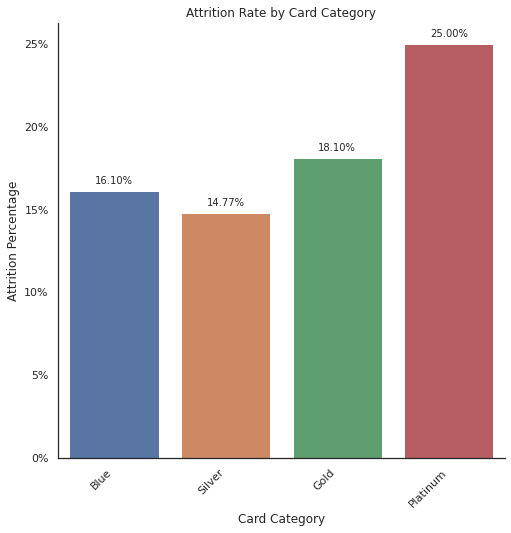

Card Category


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Card_Category,,,,
Blue/Silver,9991,1601,8390,16.02
Gold/Platinum,136,26,110,19.12


<Figure size 288x576 with 0 Axes>

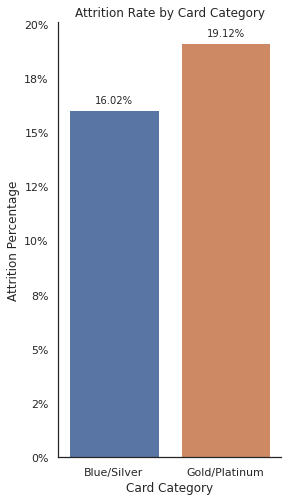

Card Category

Z-Test Result:
The p-value for 'Card Category' is 0.329, therefore we can ACCEPT the null hypothesis.


In [18]:
# Card_Category
### card product retained by the customer


##################################################
## DEFINE
### column name being references
column_name = 'Card_Category'



##################################################
## GROUPING
## CONVERT Card_Category objects to numeric values
df_cc.Card_Category[df_cc.Card_Category == 'Blue'] = 0
df_cc.Card_Category[df_cc.Card_Category == 'Silver'] = 1
df_cc.Card_Category[df_cc.Card_Category == 'Gold'] = 2
df_cc.Card_Category[df_cc.Card_Category == 'Platinum'] = 3
## CONVERT Attrition_Flag from object to int 
df_cc[colname()] = df_cc[colname()].astype(str).astype(int)



##################################################
### GROUPS for 3+ groups
group_bins = [-np.inf,
              0,
              1,
              2,
              np.inf]
group_labels = ['Blue',
                'Silver',
                'Gold',
                'Platinum']


### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 2
value2 = 2
group_bins2 = [-np.inf,
               1,
               np.inf]
#### names for groups
group_labels2 = ['Blue/Silver', 
                 'Gold/Platinum']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] < value1]
Group_B = df_cc.loc[df_cc[colname()] >= value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Card_Category = pv
## DEFINE
### dataframe for concatented range table
concat_Card_Category = df

#### Months_On_Book

In [19]:
# PREVIEW DATA

## DEFINE
column_name = 'Months_On_Book'
no_bins = 4


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Months_On_Book,,,,
"(12.957, 23.75]",687,98,589,14.26
"(23.75, 34.5]",2798,424,2374,15.15
"(34.5, 45.25]",5457,907,4550,16.62
"(45.25, 56.0]",1185,198,987,16.71


Months On Book


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Months_On_Book,,,,
12-24,847,126,721,14.88
24-36,5418,871,4547,16.08
37-48,3207,519,2688,16.18
49-60,655,111,544,16.95


<Figure size 576x576 with 0 Axes>

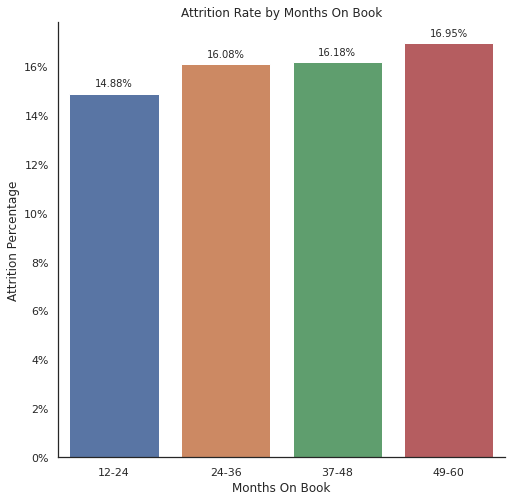

Months On Book


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Months_On_Book,,,,
Less than 36,6265,997,5268,15.91
36 or more,3862,630,3232,16.31


<Figure size 288x576 with 0 Axes>

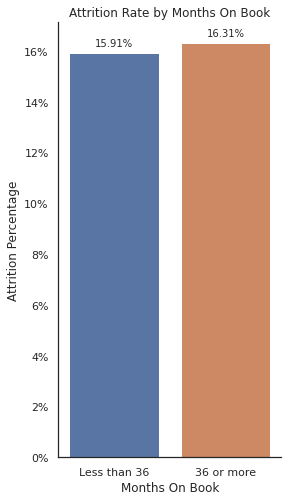

Months On Book

Z-Test Result:
The p-value for 'Months On Book' is 0.595, therefore we can ACCEPT the null hypothesis.

Mean:
The average 'Months On Book' for Existing Customers is 35.88.
The average 'Months On Book' for Attrited Customers is 36.18.

T-Test Result:
The p-value for 'Months On Book' is 0.168, therefore we can ACCEPT the null hypothesis.


In [20]:
# Months_On_Book
### length of customer relationship


##################################################
## DEFINE
### column name being references
column_name = 'Months_On_Book'

### GROUPS for 3+ groups
group_bins = [-np.inf,
              24,
              36,
              48,
              np.inf]
group_labels = ['12-24',
                '24-36',
                '37-48',
                '49-60']

### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 36
value2 = 36
group_bins2 = [-np.inf,
               36,
               np.inf]
#### names for groups
group_labels2 = ['Less than 36', 
                 '36 or more']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] <= value1]
Group_B = df_cc.loc[df_cc[colname()] > value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Months_On_Book = pv
## DEFINE
### dataframe for concatented range table
concat_Months_On_Book = df

#### Total_Relationship_Count

In [21]:
# PREVIEW DATA

## DEFINE
column_name = 'Total_Relationship_Count'
no_bins = 6


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Total_Relationship_Count,,,,
"(0.995, 1.833]",910,233,677,25.60
"(1.833, 2.667]",1243,346,897,27.84
"(2.667, 3.5]",2305,400,1905,17.35
"(3.5, 4.333]",1912,225,1687,11.77
"(4.333, 5.167]",1891,227,1664,12.00
"(5.167, 6.0]",1866,196,1670,10.50


Total Relationship Count


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Total_Relationship_Count,,,,
1,910,233,677,25.60
2,1243,346,897,27.84
3,2305,400,1905,17.35
4,1912,225,1687,11.77
5,1891,227,1664,12.00
6,1866,196,1670,10.50


<Figure size 576x576 with 0 Axes>

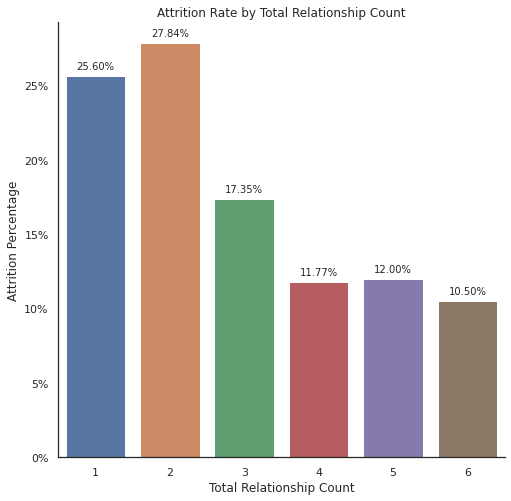

Total Relationship Count


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Total_Relationship_Count,,,,
3 or fewer,4458,979,3479,21.96
3 or more,5669,648,5021,11.43


<Figure size 288x576 with 0 Axes>

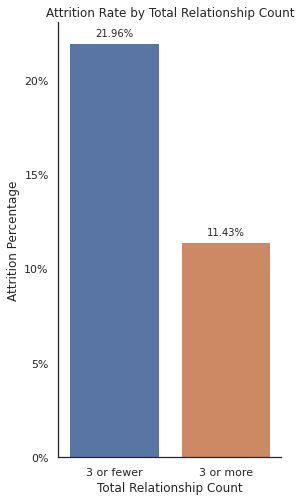

Total Relationship Count

Z-Test Result:
The p-value for 'Total Relationship Count' is 1.857e-47, therefore we can REJECT the null hypothesis.

Mean:
The average 'Total Relationship Count' for Existing Customers is 3.91.
The average 'Total Relationship Count' for Attrited Customers is 3.28.

T-Test Result:
The p-value for 'Total Relationship Count' is 4.829e-52, therefore we can REJECT the null hypothesis.


In [22]:
# Total_Relationship_Count
### number of dependents the customer has


##################################################
## DEFINE
### column name being references
column_name = 'Total_Relationship_Count'


### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 3
value2 = 3
group_bins2 = [-np.inf,
               3,
               np.inf]
#### names for groups
group_labels2 = ['3 or fewer', 
                 '3 or more']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = df_cc[colname()]

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] <= value1]
Group_B = df_cc.loc[df_cc[colname()] > value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Total_Relationship_Count = pv
## DEFINE
### dataframe for concatented range table
concat_Total_Relationship_Count = df

In [23]:
# Confidence Interval

## PRINT
print('CONFIDENCE INTERVAL')


##################################################
## CALCULATE
### sample size, sum of attrition, rate of attrition
a_n = Group_A.shape[0]
b_n = Group_B.shape[0]
a_sum_attrition = Group_A.loc[Group_A[colname()] < value1]
b_sum_attrition = Group_B.loc[Group_B[colname()] >= value2]
a_sum_attrition = Group_A['Attrition_Status'].sum()
b_sum_attrition = Group_B['Attrition_Status'].sum()
a_rate = (a_sum_attrition / a_n)
b_rate = (b_sum_attrition / b_n)
### ROUNDING
a_rate_rnd = round(a_rate * 100, 2)
b_rate_rnd = round(b_rate * 100, 2)


## PRINT CONFIRMATION
print('')
print('Sample Size A: ' + str('{:,}'.format(a_n)))
print('Sample Size B: ' + str('{:,}'.format(b_n)))
print('Sum of Attrition A: ' + str('{:,}'.format(a_sum_attrition)))
print('Sum of Attrition B: ' + str('{:,}'.format(b_sum_attrition)))
print('Attrition Rate A: ' + str(a_rate_rnd) + '%')
print('Attrition Rate B: ' + str(b_rate_rnd) + '%')



##################################################
## CALCULATE
### proportion difference, pooled sample proportion, standard error of difference, and z-statistic
prop_diff = a_rate - b_rate
pool_samp_prop = (a_sum_attrition + b_sum_attrition) / (a_n + b_n)
stand_err_diff = math.sqrt(((a_rate * (1 - a_rate)) / a_n) +((b_rate * (1 - b_rate)) / b_n))
z_stat = prop_diff / stand_err_diff
### ROUNDING
prop_diff_rnd = round(prop_diff * 100, 2)
pool_samp_prop_rnd = round(pool_samp_prop, 4)
stand_err_diff_rnd = round(stand_err_diff, 4)
z_stat_rnd = round(z_stat, 4)


## PRINT CONFIRMATION
print('')
print('Proportion Difference: ' + str(prop_diff_rnd) + '%')
print('Pooled Sample Proportion: ' + str(pool_samp_prop_rnd))
print('Pooled Sample Proportion: ' + str(stand_err_diff_rnd))
print('Z-statistic: ' + str(z_stat_rnd))



##################################################
## CALCULATE
### p-value, confidence interval, lower limit, and upper limit
deg_of_freedom = (a_n + b_n) - 1
p_value = stats.t.sf(abs(z_stat), df=deg_of_freedom) * 2
confidence_int = stand_err_diff * 1.96
ci_lower = prop_diff - confidence_int
ci_upper = prop_diff + confidence_int
### ROUNDING
p_value_rnd = np.format_float_scientific(p_value, unique=False, precision=3)
confidence_int_rnd = round(confidence_int, 4)
ci_lower_rnd = round(ci_lower * 100, 2)
ci_upper_rnd = round(ci_upper * 100, 2)


## PRINT CONFIRMATION
print('')
print('P-value : ' + p_value_rnd)
print('Confidence Interval: ' + str(confidence_int_rnd))
print('CI Lower: ' + str(ci_lower_rnd) + '%')
print('CI Upper: ' + str(ci_upper_rnd) + '%')



##################################################
## PRINT FINAL RESULTS
print('\n')
print('Result:')
print('The difference in attrition rate for \'{}\' at the 95% confidence interval is between {}% and {}%.'.format(colname().replace('_',' '), ci_lower_rnd, ci_upper_rnd))

CONFIDENCE INTERVAL

Sample Size A: 4,458
Sample Size B: 5,669
Sum of Attrition A: 979
Sum of Attrition B: 648
Attrition Rate A: 21.96%
Attrition Rate B: 11.43%

Proportion Difference: 10.53%
Pooled Sample Proportion: 0.1607
Pooled Sample Proportion: 0.0075
Z-statistic: 14.0335

P-value : 2.527e-44
Confidence Interval: 0.0147
CI Lower: 9.06%
CI Upper: 12.0%


Result:
The difference in attrition rate for 'Total Relationship Count' at the 95% confidence interval is between 9.06% and 12.0%.


#### Months_Inactive_12_Mon

In [24]:
# PREVIEW DATA

## DEFINE
column_name = 'Months_Inactive_12_Mon'
no_bins = 4


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Months_Inactive_12_Mon,,,,
"(-0.006, 1.5]",2262,115,2147,5.08
"(1.5, 3.0]",7128,1331,5797,18.67
"(3.0, 4.5]",435,130,305,29.89
"(4.5, 6.0]",302,51,251,16.89


Months Inactive 12 Mon


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Months_Inactive_12_Mon,,,,
0,29,15,14,51.72
1,2233,100,2133,4.48
2,3282,505,2777,15.39
3,3846,826,3020,21.48
4,435,130,305,29.89
5,178,32,146,17.98
6,124,19,105,15.32


<Figure size 576x576 with 0 Axes>

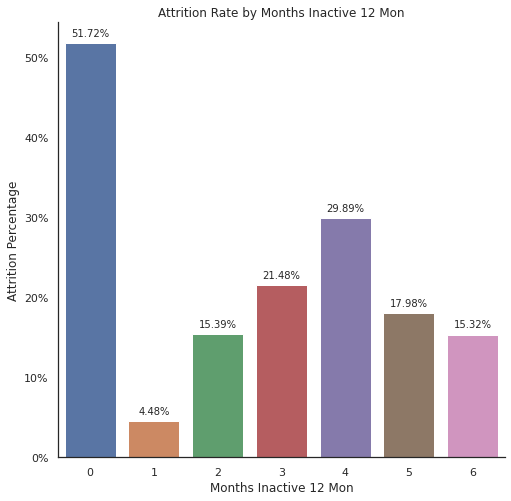

Months Inactive 12 Mon


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Months_Inactive_12_Mon,,,,
2 or fewer,5544,620,4924,11.18
2 or more,4583,1007,3576,21.97


<Figure size 288x576 with 0 Axes>

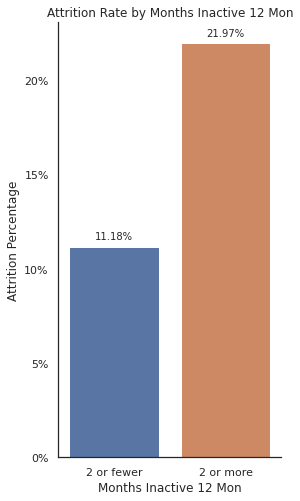

Months Inactive 12 Mon

Z-Test Result:
The p-value for 'Months Inactive 12 Mon' is 4.767e-50, therefore we can REJECT the null hypothesis.

Mean:
The average 'Months Inactive 12 Mon' for Existing Customers is 2.27.
The average 'Months Inactive 12 Mon' for Attrited Customers is 2.69.

T-Test Result:
The p-value for 'Months Inactive 12 Mon' is 1.033e-53, therefore we can REJECT the null hypothesis.


In [25]:
# Months_Inactive_12_Mon
### number of months the customer has been inactive over the past 12 months


##################################################
## DEFINE
### column name being references
column_name = 'Months_Inactive_12_Mon'


### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 2
value2 = 2
group_bins2 = [-np.inf,
               2,
               np.inf]
#### names for groups
group_labels2 = ['2 or fewer', 
                 '2 or more']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = df_cc[colname()]

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] <= value1]
Group_B = df_cc.loc[df_cc[colname()] > value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Months_Inactive_12_Mon = pv
## DEFINE
### dataframe for concatented range table
concat_Months_Inactive_12_Mon = df

In [26]:
# Confidence Interval

## PRINT
print('CONFIDENCE INTERVAL')


##################################################
## CALCULATE
### sample size, sum of attrition, rate of attrition
a_n = Group_A.shape[0]
b_n = Group_B.shape[0]
a_sum_attrition = Group_A.loc[Group_A[colname()] < value1]
b_sum_attrition = Group_B.loc[Group_B[colname()] >= value2]
a_sum_attrition = Group_A['Attrition_Status'].sum()
b_sum_attrition = Group_B['Attrition_Status'].sum()
a_rate = (a_sum_attrition / a_n)
b_rate = (b_sum_attrition / b_n)
### ROUNDING
a_rate_rnd = round(a_rate * 100, 2)
b_rate_rnd = round(b_rate * 100, 2)


## PRINT CONFIRMATION
print('')
print('Sample Size A: ' + str('{:,}'.format(a_n)))
print('Sample Size B: ' + str('{:,}'.format(b_n)))
print('Sum of Attrition A: ' + str('{:,}'.format(a_sum_attrition)))
print('Sum of Attrition B: ' + str('{:,}'.format(b_sum_attrition)))
print('Attrition Rate A: ' + str(a_rate_rnd) + '%')
print('Attrition Rate B: ' + str(b_rate_rnd) + '%')



##################################################
## CALCULATE
### proportion difference, pooled sample proportion, standard error of difference, and z-statistic
prop_diff = a_rate - b_rate
pool_samp_prop = (a_sum_attrition + b_sum_attrition) / (a_n + b_n)
stand_err_diff = math.sqrt(((a_rate * (1 - a_rate)) / a_n) +((b_rate * (1 - b_rate)) / b_n))
z_stat = prop_diff / stand_err_diff
### ROUNDING
prop_diff_rnd = round(prop_diff * 100, 2)
pool_samp_prop_rnd = round(pool_samp_prop, 4)
stand_err_diff_rnd = round(stand_err_diff, 4)
z_stat_rnd = round(z_stat, 4)


## PRINT CONFIRMATION
print('')
print('Proportion Difference: ' + str(prop_diff_rnd) + '%')
print('Pooled Sample Proportion: ' + str(pool_samp_prop_rnd))
print('Pooled Sample Proportion: ' + str(stand_err_diff_rnd))
print('Z-statistic: ' + str(z_stat_rnd))



##################################################
## CALCULATE
### p-value, confidence interval, lower limit, and upper limit
deg_of_freedom = (a_n + b_n) - 1
p_value = stats.t.sf(abs(z_stat), df=deg_of_freedom) * 2
confidence_int = stand_err_diff * 1.96
ci_lower = prop_diff - confidence_int
ci_upper = prop_diff + confidence_int
### ROUNDING
p_value_rnd = np.format_float_scientific(p_value, unique=False, precision=3)
confidence_int_rnd = round(confidence_int, 4)
ci_lower_rnd = round(ci_lower * 100, 2)
ci_upper_rnd = round(ci_upper * 100, 2)


## PRINT CONFIRMATION
print('')
print('P-value : ' + p_value_rnd)
print('Confidence Interval: ' + str(confidence_int_rnd))
print('CI Lower: ' + str(ci_lower_rnd) + '%')
print('CI Upper: ' + str(ci_upper_rnd) + '%')



##################################################
## PRINT FINAL RESULTS
print('\n')
print('Result:')
print('The difference in attrition rate for \'{}\' at the 95% confidence interval is between {}% and {}%.'.format(colname().replace('_',' '), ci_lower_rnd, ci_upper_rnd))

CONFIDENCE INTERVAL

Sample Size A: 5,544
Sample Size B: 4,583
Sum of Attrition A: 620
Sum of Attrition B: 1,007
Attrition Rate A: 11.18%
Attrition Rate B: 21.97%

Proportion Difference: -10.79%
Pooled Sample Proportion: 0.1607
Pooled Sample Proportion: 0.0074
Z-statistic: -14.5054

P-value : 3.325e-47
Confidence Interval: 0.0146
CI Lower: -12.25%
CI Upper: -9.33%


Result:
The difference in attrition rate for 'Months Inactive 12 Mon' at the 95% confidence interval is between -12.25% and -9.33%.


#### Contacts_Count_12_Mon

In [27]:
# PREVIEW DATA

## DEFINE
column_name = 'Contacts_Count_12_Mon'
no_bins = 6


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Contacts_Count_12_Mon,,,,
"(-0.006, 1.0]",1898,115,1783,6.06
"(1.0, 2.0]",3227,403,2824,12.49
"(2.0, 3.0]",3380,681,2699,20.15
"(3.0, 4.0]",1392,315,1077,22.63
"(4.0, 5.0]",176,59,117,33.52
"(5.0, 6.0]",54,54,0,100.00


Contacts Count 12 Mon


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Contacts_Count_12_Mon,,,,
0,399.0,7.0,392.0,1.75
1,1499.0,108.0,1391.0,7.20
2,3227.0,403.0,2824.0,12.49
3,3380.0,681.0,2699.0,20.15
4,1392.0,315.0,1077.0,22.63
5,176.0,59.0,117.0,33.52
6,NaN,54.0,NaN,NaN


<Figure size 576x576 with 0 Axes>

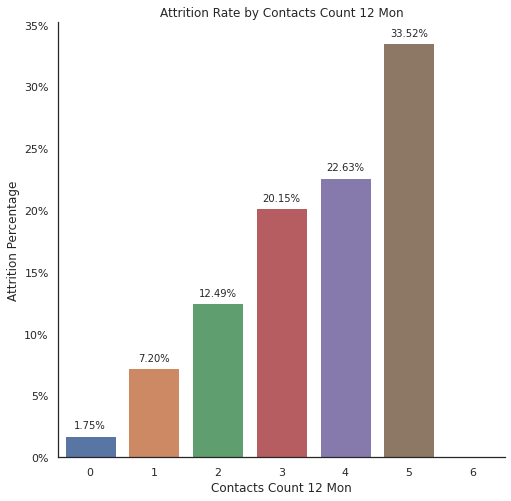

Contacts Count 12 Mon


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Contacts_Count_12_Mon,,,,
2 or fewer,5125,518,4607,10.11
2 or more,5002,1109,3893,22.17


<Figure size 288x576 with 0 Axes>

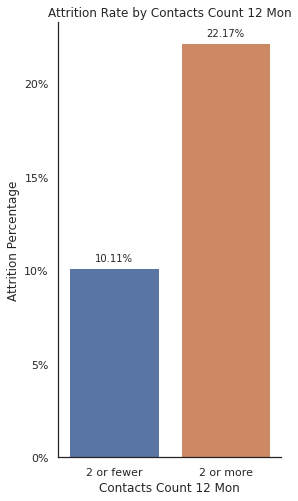

Contacts Count 12 Mon

Z-Test Result:
The p-value for 'Contacts Count 12 Mon' is 5.234e-63, therefore we can REJECT the null hypothesis.

Mean:
The average 'Contacts Count 12 Mon' for Existing Customers is 2.36.
The average 'Contacts Count 12 Mon' for Attrited Customers is 2.97.

T-Test Result:
The p-value for 'Contacts Count 12 Mon' is 4.697e-96, therefore we can REJECT the null hypothesis.


In [28]:
# Contacts_Count_12_Mon
### number of contacts the customer has had in the past 12 months


##################################################
## DEFINE
### column name being references
column_name = 'Contacts_Count_12_Mon'


### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 2
value2 = 2
group_bins2 = [-np.inf,
               2,
               np.inf]
#### names for groups
group_labels2 = ['2 or fewer', 
                 '2 or more']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = df_cc[colname()]

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] <= value1]
Group_B = df_cc.loc[df_cc[colname()] > value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Contacts_Count_12_Mon = pv
## DEFINE
### dataframe for concatented range table
concat_Contacts_Count_12_Mon = df

In [29]:
# Confidence Interval

## PRINT
print('CONFIDENCE INTERVAL')


##################################################
## CALCULATE
### sample size, sum of attrition, rate of attrition
a_n = Group_A.shape[0]
b_n = Group_B.shape[0]
a_sum_attrition = Group_A.loc[Group_A[colname()] < value1]
b_sum_attrition = Group_B.loc[Group_B[colname()] >= value2]
a_sum_attrition = Group_A['Attrition_Status'].sum()
b_sum_attrition = Group_B['Attrition_Status'].sum()
a_rate = (a_sum_attrition / a_n)
b_rate = (b_sum_attrition / b_n)
### ROUNDING
a_rate_rnd = round(a_rate * 100, 2)
b_rate_rnd = round(b_rate * 100, 2)


## PRINT CONFIRMATION
print('')
print('Sample Size A: ' + str('{:,}'.format(a_n)))
print('Sample Size B: ' + str('{:,}'.format(b_n)))
print('Sum of Attrition A: ' + str('{:,}'.format(a_sum_attrition)))
print('Sum of Attrition B: ' + str('{:,}'.format(b_sum_attrition)))
print('Attrition Rate A: ' + str(a_rate_rnd) + '%')
print('Attrition Rate B: ' + str(b_rate_rnd) + '%')



##################################################
## CALCULATE
### proportion difference, pooled sample proportion, standard error of difference, and z-statistic
prop_diff = a_rate - b_rate
pool_samp_prop = (a_sum_attrition + b_sum_attrition) / (a_n + b_n)
stand_err_diff = math.sqrt(((a_rate * (1 - a_rate)) / a_n) +((b_rate * (1 - b_rate)) / b_n))
z_stat = prop_diff / stand_err_diff
### ROUNDING
prop_diff_rnd = round(prop_diff * 100, 2)
pool_samp_prop_rnd = round(pool_samp_prop, 4)
stand_err_diff_rnd = round(stand_err_diff, 4)
z_stat_rnd = round(z_stat, 4)


## PRINT CONFIRMATION
print('')
print('Proportion Difference: ' + str(prop_diff_rnd) + '%')
print('Pooled Sample Proportion: ' + str(pool_samp_prop_rnd))
print('Pooled Sample Proportion: ' + str(stand_err_diff_rnd))
print('Z-statistic: ' + str(z_stat_rnd))



##################################################
## CALCULATE
### p-value, confidence interval, lower limit, and upper limit
deg_of_freedom = (a_n + b_n) - 1
p_value = stats.t.sf(abs(z_stat), df=deg_of_freedom) * 2
confidence_int = stand_err_diff * 1.96
ci_lower = prop_diff - confidence_int
ci_upper = prop_diff + confidence_int
### ROUNDING
p_value_rnd = np.format_float_scientific(p_value, unique=False, precision=3)
confidence_int_rnd = round(confidence_int, 4)
ci_lower_rnd = round(ci_lower * 100, 2)
ci_upper_rnd = round(ci_upper * 100, 2)


## PRINT CONFIRMATION
print('')
print('P-value : ' + p_value_rnd)
print('Confidence Interval: ' + str(confidence_int_rnd))
print('CI Lower: ' + str(ci_lower_rnd) + '%')
print('CI Upper: ' + str(ci_upper_rnd) + '%')



##################################################
## PRINT FINAL RESULTS
print('\n')
print('Result:')
print('The difference in attrition rate for \'{}\' at the 95% confidence interval is between {}% and {}%.'.format(colname().replace('_',' '), ci_lower_rnd, ci_upper_rnd))

CONFIDENCE INTERVAL

Sample Size A: 5,125
Sample Size B: 5,002
Sum of Attrition A: 518
Sum of Attrition B: 1,109
Attrition Rate A: 10.11%
Attrition Rate B: 22.17%

Proportion Difference: -12.06%
Pooled Sample Proportion: 0.1607
Pooled Sample Proportion: 0.0072
Z-statistic: -16.6933

P-value : 9.762e-62
Confidence Interval: 0.0142
CI Lower: -13.48%
CI Upper: -10.65%


Result:
The difference in attrition rate for 'Contacts Count 12 Mon' at the 95% confidence interval is between -13.48% and -10.65%.


#### Credit_Limit

In [30]:
# PREVIEW DATA

## DEFINE
column_name = 'Credit_Limit'
no_bins = 10


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Credit_Limit,,,,
"(1405.222, 4746.07]",5211,898,4313,17.23
"(4746.07, 8053.84]",1524,228,1296,14.96
"(8053.84, 11361.61]",931,141,790,15.15
"(11361.61, 14669.38]",589,95,494,16.13
"(14669.38, 17977.15]",407,56,351,13.76
"(17977.15, 21284.92]",299,34,265,11.37
"(21284.92, 24592.69]",252,28,224,11.11
"(24592.69, 27900.46]",161,22,139,13.66
"(27900.46, 31208.23]",128,20,108,15.62


Credit Limit


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Credit_Limit,,,,
<$5k,5359,926,4433,17.28
$5k-$10k,2014,302,1712,15.00
$10k-$15k,941,145,796,15.41
$15k-$20k,549,70,479,12.75
>$20k,1264,184,1080,14.56


<Figure size 576x576 with 0 Axes>

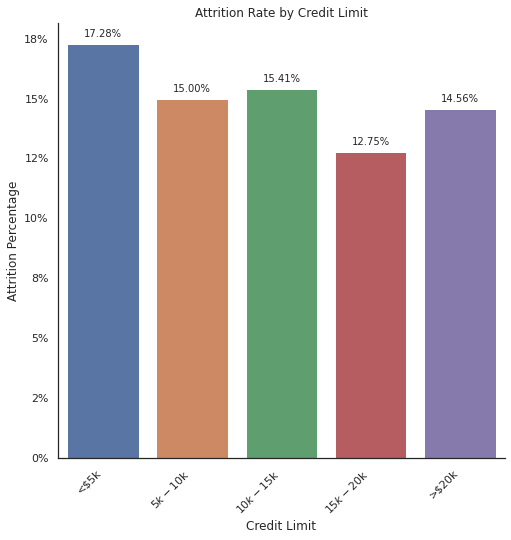

Credit Limit


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Credit_Limit,,,,
Less than $5k,5359,926,4433,17.28
$5k or more,4768,701,4067,14.70


<Figure size 288x576 with 0 Axes>

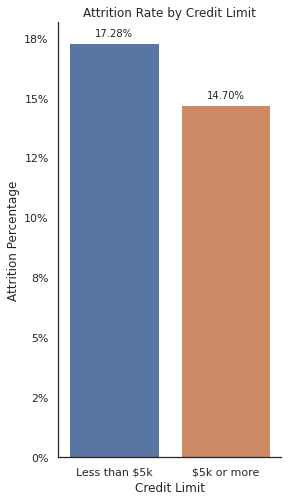

Credit Limit

Z-Test Result:
The p-value for 'Credit Limit' is 4.202e-04, therefore we can REJECT the null hypothesis.

Mean:
The average 'Credit Limit' for Existing Customers is 8726.88.
The average 'Credit Limit' for Attrited Customers is 8136.04.

T-Test Result:
The p-value for 'Credit Limit' is 0.016, therefore we can REJECT the null hypothesis.


In [31]:
# Credit_Limit
### age of customer


##################################################
## DEFINE
### column name being references
column_name = 'Credit_Limit'

### GROUPS for 3+ groups
group_bins = [-np.inf,
              5000,
              10000,
              15000,
              20000,
              np.inf]
group_labels = ['<$5k',
                '$5k-$10k',
                '$10k-$15k',
                '$15k-$20k',
                '>$20k']

### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 5000
value2 = 5000
group_bins2 = [-np.inf,
               5000,
               np.inf]
#### names for groups
group_labels2 = ['Less than $5k', 
                 '$5k or more']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] <= value1]
Group_B = df_cc.loc[df_cc[colname()] > value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Credit_Limit = pv
## DEFINE
### dataframe for concatented range table
concat_Credit_Limit = df

#### Total_Revolving_Bal

In [32]:
# PREVIEW DATA

## DEFINE
column_name = 'Total_Revolving_Bal'
no_bins = 4


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Total_Revolving_Bal,,,,
"(-2.517, 629.25]",2761,1047,1714,37.92
"(629.25, 1258.5]",2218,166,2052,7.48
"(1258.5, 1887.75]",3055,138,2917,4.52
"(1887.75, 2517.0]",2093,276,1817,13.19


Total Revolving Bal


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Total_Revolving_Bal,,,,
<$500,2596,999,1597,38.48
"$1,500-$1,000",1317,163,1154,12.38
"$1,000-$1,500",2258,102,2156,4.52
"$1,500-$2,000",2291,109,2182,4.76
">$2,000",1665,254,1411,15.26


<Figure size 576x576 with 0 Axes>

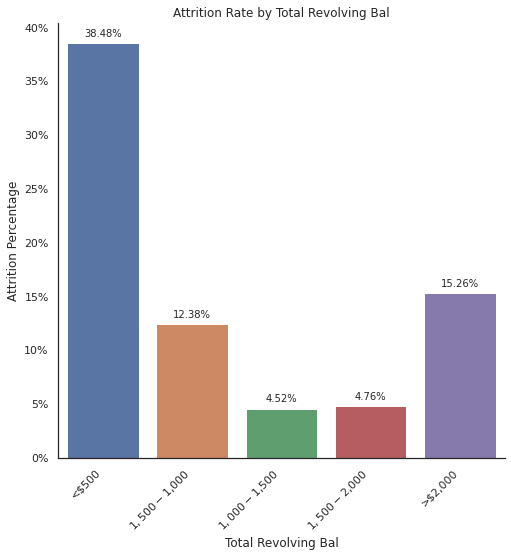

Total Revolving Bal


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Total_Revolving_Bal,,,,
"Less than $1,250",4931,1211,3720,24.56
"$1,250 or more",5196,416,4780,8.01


<Figure size 288x576 with 0 Axes>

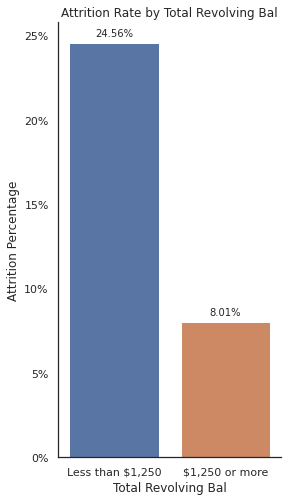

Total Revolving Bal

Z-Test Result:
The p-value for 'Total Revolving Bal' is 9.121e-120, therefore we can REJECT the null hypothesis.

Mean:
The average 'Total Revolving Bal' for Existing Customers is 1256.60.
The average 'Total Revolving Bal' for Attrited Customers is 672.82.

T-Test Result:
The p-value for 'Total Revolving Bal' is 6.630e-160, therefore we can REJECT the null hypothesis.


In [33]:
# Total_Revolving_Bal
### balance carried over after last billing cycle


##################################################
## DEFINE
### column name being references
column_name = 'Total_Revolving_Bal'

### GROUPS for 3+ groups
group_bins = [-np.inf,
              500,
              1000,
              1500,
              2000,
              np.inf]
group_labels = ['<$500',
                '$1,500-$1,000',
                '$1,000-$1,500',
                '$1,500-$2,000',
                '>$2,000']

### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 1250
value2 = 1250
group_bins2 = [-np.inf,
               1250,
               np.inf]
#### names for groups
group_labels2 = ['Less than $1,250', 
                 '$1,250 or more']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] <= value1]
Group_B = df_cc.loc[df_cc[colname()] > value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Total_Revolving_Bal = pv
## DEFINE
### dataframe for concatented range table
concat_Total_Revolving_Bal = df

In [34]:
# Confidence Interval

## PRINT
print('CONFIDENCE INTERVAL')


##################################################
## CALCULATE
### sample size, sum of attrition, rate of attrition
a_n = Group_A.shape[0]
b_n = Group_B.shape[0]
a_sum_attrition = Group_A.loc[Group_A[colname()] < value1]
b_sum_attrition = Group_B.loc[Group_B[colname()] >= value2]
a_sum_attrition = Group_A['Attrition_Status'].sum()
b_sum_attrition = Group_B['Attrition_Status'].sum()
a_rate = (a_sum_attrition / a_n)
b_rate = (b_sum_attrition / b_n)
### ROUNDING
a_rate_rnd = round(a_rate * 100, 2)
b_rate_rnd = round(b_rate * 100, 2)


## PRINT CONFIRMATION
print('')
print('Sample Size A: ' + str('{:,}'.format(a_n)))
print('Sample Size B: ' + str('{:,}'.format(b_n)))
print('Sum of Attrition A: ' + str('{:,}'.format(a_sum_attrition)))
print('Sum of Attrition B: ' + str('{:,}'.format(b_sum_attrition)))
print('Attrition Rate A: ' + str(a_rate_rnd) + '%')
print('Attrition Rate B: ' + str(b_rate_rnd) + '%')



##################################################
## CALCULATE
### proportion difference, pooled sample proportion, standard error of difference, and z-statistic
prop_diff = a_rate - b_rate
pool_samp_prop = (a_sum_attrition + b_sum_attrition) / (a_n + b_n)
stand_err_diff = math.sqrt(((a_rate * (1 - a_rate)) / a_n) +((b_rate * (1 - b_rate)) / b_n))
z_stat = prop_diff / stand_err_diff
### ROUNDING
prop_diff_rnd = round(prop_diff * 100, 2)
pool_samp_prop_rnd = round(pool_samp_prop, 4)
stand_err_diff_rnd = round(stand_err_diff, 4)
z_stat_rnd = round(z_stat, 4)


## PRINT CONFIRMATION
print('')
print('Proportion Difference: ' + str(prop_diff_rnd) + '%')
print('Pooled Sample Proportion: ' + str(pool_samp_prop_rnd))
print('Pooled Sample Proportion: ' + str(stand_err_diff_rnd))
print('Z-statistic: ' + str(z_stat_rnd))



##################################################
## CALCULATE
### p-value, confidence interval, lower limit, and upper limit
deg_of_freedom = (a_n + b_n) - 1
p_value = stats.t.sf(abs(z_stat), df=deg_of_freedom) * 2
confidence_int = stand_err_diff * 1.96
ci_lower = prop_diff - confidence_int
ci_upper = prop_diff + confidence_int
### ROUNDING
p_value_rnd = np.format_float_scientific(p_value, unique=False, precision=3)
confidence_int_rnd = round(confidence_int, 4)
ci_lower_rnd = round(ci_lower * 100, 2)
ci_upper_rnd = round(ci_upper * 100, 2)


## PRINT CONFIRMATION
print('')
print('P-value : ' + p_value_rnd)
print('Confidence Interval: ' + str(confidence_int_rnd))
print('CI Lower: ' + str(ci_lower_rnd) + '%')
print('CI Upper: ' + str(ci_upper_rnd) + '%')



##################################################
## PRINT FINAL RESULTS
print('\n')
print('Result:')
print('The difference in attrition rate for \'{}\' at the 95% confidence interval is between {}% and {}%.'.format(colname().replace('_',' '), ci_lower_rnd, ci_upper_rnd))

CONFIDENCE INTERVAL

Sample Size A: 4,931
Sample Size B: 5,196
Sum of Attrition A: 1,211
Sum of Attrition B: 416
Attrition Rate A: 24.56%
Attrition Rate B: 8.01%

Proportion Difference: 16.55%
Pooled Sample Proportion: 0.1607
Pooled Sample Proportion: 0.0072
Z-statistic: 23.0103

P-value : 3.030e-114
Confidence Interval: 0.0141
CI Lower: 15.14%
CI Upper: 17.96%


Result:
The difference in attrition rate for 'Total Revolving Bal' at the 95% confidence interval is between 15.14% and 17.96%.


#### Avg_Open_To_Buy

In [35]:
# PREVIEW DATA

## DEFINE
column_name = 'Avg_Open_To_Buy'
no_bins = 8


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Avg_Open_To_Buy,,,,
"(-31.513, 4317.125]",5612,908,4704,16.18
"(4317.125, 8631.25]",1680,279,1401,16.61
"(8631.25, 12945.375]",872,156,716,17.89
"(12945.375, 17259.5]",548,74,474,13.50
"(17259.5, 21573.625]",367,40,327,10.90
"(21573.625, 25887.75]",251,37,214,14.74
"(25887.75, 30201.875]",181,26,155,14.36
"(30201.875, 34516.0]",616,107,509,17.37


Avg Open To Buy


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Avg_Open_To_Buy,,,,
<$5k,5989,976,5013,16.30
$5k-$10k,1642,273,1369,16.63
$10k-$15k,820,134,686,16.34
$15k-$20k,509,64,445,12.57
>$20k,1167,180,987,15.42


<Figure size 576x576 with 0 Axes>

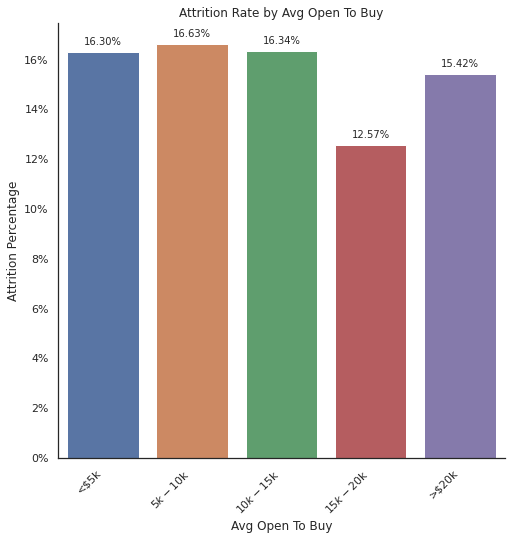

Avg Open To Buy


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Avg_Open_To_Buy,,,,
Less than $5k,5989,976,5013,16.30
$5k or more,4138,651,3487,15.73


<Figure size 288x576 with 0 Axes>

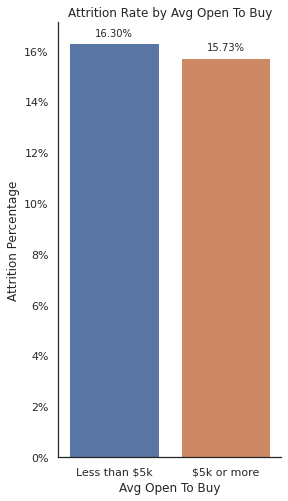

Avg Open To Buy

Z-Test Result:
The p-value for 'Avg Open To Buy' is 0.447, therefore we can ACCEPT the null hypothesis.

Mean:
The average 'Avg Open To Buy' for Existing Customers is 7470.27.
The average 'Avg Open To Buy' for Attrited Customers is 7463.22.

T-Test Result:
The p-value for 'Avg Open To Buy' is 0.977, therefore we can ACCEPT the null hypothesis.


In [36]:
# Avg_Open_To_Buy
### average available credit


##################################################
## DEFINE
### column name being references
column_name = 'Avg_Open_To_Buy'

### GROUPS for 3+ groups
group_bins = [-np.inf,
              5000,
              10000,
              15000,
              20000,
              np.inf]
group_labels = ['<$5k',
                '$5k-$10k',
                '$10k-$15k',
                '$15k-$20k',
                '>$20k']

### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 5000
value2 = 5000
group_bins2 = [-np.inf,
               5000,
               np.inf]
#### names for groups
group_labels2 = ['Less than $5k', 
                 '$5k or more']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] <= value1]
Group_B = df_cc.loc[df_cc[colname()] > value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Avg_Open_To_Buy = pv
## DEFINE
### dataframe for concatented range table
concat_Avg_Open_To_Buy = df

#### Total_Amt_Chng_Q4_Q1

In [37]:
# PREVIEW DATA

## DEFINE
column_name = 'Total_Amt_Chng_Q4_Q1'
no_bins = 4


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Total_Amt_Chng_Q4_Q1,,,,
"(-0.0034, 0.849]",7427,1203,6224,16.20
"(0.849, 1.698]",2651,424,2227,15.99
"(1.698, 2.548]",45,0,45,0.00
"(2.548, 3.397]",4,0,4,0.00


Total Amt Chng Q4 Q1


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Total_Amt_Chng_Q4_Q1,,,,
Negative Change,9063,1469,7594,16.21
Positive Change,1064,158,906,14.85


<Figure size 288x576 with 0 Axes>

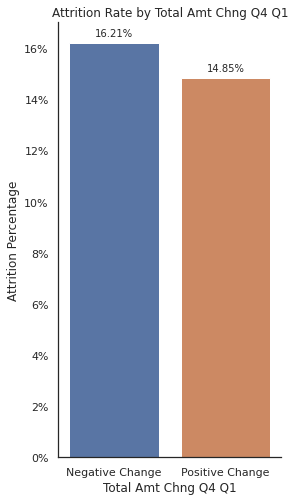

Total Amt Chng Q4 Q1

Z-Test Result:
The p-value for 'Total Amt Chng Q4 Q1' is 0.307, therefore we can ACCEPT the null hypothesis.

Mean:
The average 'Total Amt Chng Q4 Q1' for Existing Customers is 0.77.
The average 'Total Amt Chng Q4 Q1' for Attrited Customers is 0.69.

T-Test Result:
The p-value for 'Total Amt Chng Q4 Q1' is 4.837e-40, therefore we can REJECT the null hypothesis.


In [38]:
# Total_Amt_Chng_Q4_Q1
### change in amount charged from quarter 1 to quarter 4


##################################################
## DEFINE
### column name being references
column_name = 'Total_Amt_Chng_Q4_Q1'

### GROUPS for 3+ groups
group_bins = [-np.inf,
              .99,
              np.inf]
group_labels = ['Negative Change',
                'Positive Change']

### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = .99
value2 = .99
group_bins2 = [-np.inf,
               .99,
               np.inf]
#### names for groups
group_labels2 = ['Negative Change', 
                 'Positive Change']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] < value1]
Group_B = df_cc.loc[df_cc[colname()] >= value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



# ##################################################
# ##################################################
# ## PIVOT TABLE
# ### 3+ GROUPS


# ## CREATE
# ### pivot table
# pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# # ## SORT (IF NEEDED)
# # ### rows
# # pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

# ## RENAME 
# ### 'Attrited Customer' and 'Existing Customer'
# pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
#                                  'Existing Customer': 'Existing_Customers'})

# ## ADD 
# ### column 'Total_Customers'
# pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
# ## MOVE 
# ### column
# cols = pv.columns.tolist() # list of columns
# cols.insert(0, cols.pop(cols.index('Total_Customers')))
# pv = pv.reindex(columns = cols)

# ## ADD 
# ### column 'Attrition_Percent;
# pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


# ## PRINT pivot table
# print(colname().replace('_',' '))
# display(pv)



# ##################################################
# # BAR PLOT
# ## 3+ GROUPS


# ## SETTINGS
# ### 
# plotsize = plt.figure(figsize=(4, 8))
# ay, fig = plt.subplots(figsize=(4, 8))   
# sns.set_style("white")

# ## CREATE
# ### bar plot
# bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
# plt.xlabel(colname().replace('_',' '))
# plt.ylabel('Attrition Percentage')
# plt.title('Attrition Rate by ' + colname().replace('_',' '))
# sns.despine()

# ## FORMAT
# ### bar plot
# for p in bplot.patches:
#   bplot.annotate('{:.2f}%'.format(p.get_height()), 
#                  (p.get_x() + p.get_width() / 2., p.get_height()), 
#                  va = 'center', 
#                  xytext = (0, 10), 
#                  textcoords = 'offset points',
#                  ha = 'center')

# y = 'Attrition Percentage'
# ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
# bplot.set_yticklabels(ylabels)
# bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

# ## PRINT
# ### bar plot
# plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Total_Amt_Chng_Q4_Q1 = pv
## DEFINE
### dataframe for concatented range table
concat_Total_Amt_Chng_Q4_Q1 = df

#### Total_Trans_Amt

In [39]:
# PREVIEW DATA

## DEFINE
column_name = 'Total_Trans_Amt'
no_bins = 8


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Total_Trans_Amt,,,,
"(492.026, 2756.75]",3672,1215,2457,33.09
"(2756.75, 5003.5]",4574,156,4418,3.41
"(5003.5, 7250.25]",494,54,440,10.93
"(7250.25, 9497.0]",618,181,437,29.29
"(9497.0, 11743.75]",23,21,2,91.30
"(11743.75, 13990.5]",193,0,193,0.00
"(13990.5, 16237.25]",490,0,490,0.00
"(16237.25, 18484.0]",63,0,63,0.00


Total Trans Amt


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Total_Trans_Amt,,,,
<$2k,2208,472,1736,21.38
$2k-$4k,3080,846,2234,27.47
$4k-$6k,3389,84,3305,2.48
>$6k,1450,225,1225,15.52


<Figure size 576x576 with 0 Axes>

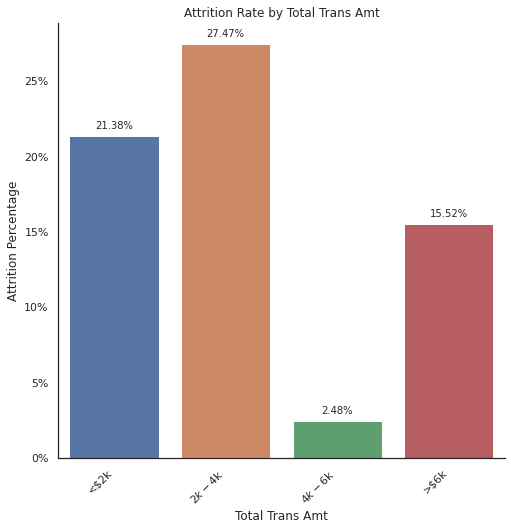

Total Trans Amt


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Total_Trans_Amt,,,,
Less than $4k,5288,1318,3970,24.92
$4k or more,4839,309,4530,6.39


<Figure size 288x576 with 0 Axes>

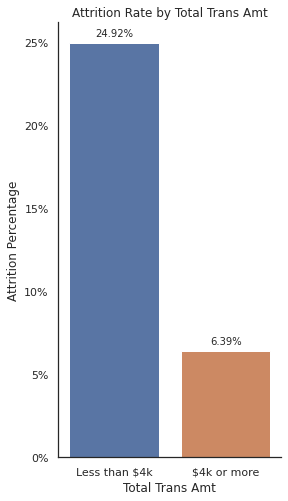

Total Trans Amt

Z-Test Result:
The p-value for 'Total Trans Amt' is 1.493e-151, therefore we can REJECT the null hypothesis.

Mean:
The average 'Total Trans Amt' for Existing Customers is 4654.66.
The average 'Total Trans Amt' for Attrited Customers is 3095.03.

T-Test Result:
The p-value for 'Total Trans Amt' is 1.857e-65, therefore we can REJECT the null hypothesis.


In [40]:
# Total_Trans_Amt
### total amount of transactions over the past 12 months


##################################################
## DEFINE
### column name being references
column_name = 'Total_Trans_Amt'

### GROUPS for 3+ groups
group_bins = [-np.inf,
              2000,
              4000,
              6000,
              np.inf]
group_labels = ['<$2k',
                '$2k-$4k',
                '$4k-$6k',
                '>$6k']

### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 4000
value2 = 4000
group_bins2 = [-np.inf,
               4000,
               np.inf]
#### names for groups
group_labels2 = ['Less than $4k', 
                 '$4k or more']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] <= value1]
Group_B = df_cc.loc[df_cc[colname()] > value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Total_Trans_Amt = pv
## DEFINE
### dataframe for concatented range table
concat_Total_Trans_Amt = df

In [41]:
# Confidence Interval

## PRINT
print('CONFIDENCE INTERVAL')


##################################################
## CALCULATE
### sample size, sum of attrition, rate of attrition
a_n = Group_A.shape[0]
b_n = Group_B.shape[0]
a_sum_attrition = Group_A.loc[Group_A[colname()] < value1]
b_sum_attrition = Group_B.loc[Group_B[colname()] >= value2]
a_sum_attrition = Group_A['Attrition_Status'].sum()
b_sum_attrition = Group_B['Attrition_Status'].sum()
a_rate = (a_sum_attrition / a_n)
b_rate = (b_sum_attrition / b_n)
### ROUNDING
a_rate_rnd = round(a_rate * 100, 2)
b_rate_rnd = round(b_rate * 100, 2)


## PRINT CONFIRMATION
print('')
print('Sample Size A: ' + str('{:,}'.format(a_n)))
print('Sample Size B: ' + str('{:,}'.format(b_n)))
print('Sum of Attrition A: ' + str('{:,}'.format(a_sum_attrition)))
print('Sum of Attrition B: ' + str('{:,}'.format(b_sum_attrition)))
print('Attrition Rate A: ' + str(a_rate_rnd) + '%')
print('Attrition Rate B: ' + str(b_rate_rnd) + '%')



##################################################
## CALCULATE
### proportion difference, pooled sample proportion, standard error of difference, and z-statistic
prop_diff = a_rate - b_rate
pool_samp_prop = (a_sum_attrition + b_sum_attrition) / (a_n + b_n)
stand_err_diff = math.sqrt(((a_rate * (1 - a_rate)) / a_n) +((b_rate * (1 - b_rate)) / b_n))
z_stat = prop_diff / stand_err_diff
### ROUNDING
prop_diff_rnd = round(prop_diff * 100, 2)
pool_samp_prop_rnd = round(pool_samp_prop, 4)
stand_err_diff_rnd = round(stand_err_diff, 4)
z_stat_rnd = round(z_stat, 4)


## PRINT CONFIRMATION
print('')
print('Proportion Difference: ' + str(prop_diff_rnd) + '%')
print('Pooled Sample Proportion: ' + str(pool_samp_prop_rnd))
print('Pooled Sample Proportion: ' + str(stand_err_diff_rnd))
print('Z-statistic: ' + str(z_stat_rnd))



##################################################
## CALCULATE
### p-value, confidence interval, lower limit, and upper limit
deg_of_freedom = (a_n + b_n) - 1
p_value = stats.t.sf(abs(z_stat), df=deg_of_freedom) * 2
confidence_int = stand_err_diff * 1.96
ci_lower = prop_diff - confidence_int
ci_upper = prop_diff + confidence_int
### ROUNDING
p_value_rnd = np.format_float_scientific(p_value, unique=False, precision=3)
confidence_int_rnd = round(confidence_int, 4)
ci_lower_rnd = round(ci_lower * 100, 2)
ci_upper_rnd = round(ci_upper * 100, 2)


## PRINT CONFIRMATION
print('')
print('P-value : ' + p_value_rnd)
print('Confidence Interval: ' + str(confidence_int_rnd))
print('CI Lower: ' + str(ci_lower_rnd) + '%')
print('CI Upper: ' + str(ci_upper_rnd) + '%')



##################################################
## PRINT FINAL RESULTS
print('\n')
print('Result:')
print('The difference in attrition rate for \'{}\' at the 95% confidence interval is between {}% and {}%.'.format(colname().replace('_',' '), ci_lower_rnd, ci_upper_rnd))

CONFIDENCE INTERVAL

Sample Size A: 5,288
Sample Size B: 4,839
Sum of Attrition A: 1,318
Sum of Attrition B: 309
Attrition Rate A: 24.92%
Attrition Rate B: 6.39%

Proportion Difference: 18.54%
Pooled Sample Proportion: 0.1607
Pooled Sample Proportion: 0.0069
Z-statistic: 26.8313

P-value : 2.928e-153
Confidence Interval: 0.0135
CI Lower: 17.18%
CI Upper: 19.89%


Result:
The difference in attrition rate for 'Total Trans Amt' at the 95% confidence interval is between 17.18% and 19.89%.


#### Total_Trans_Ct


In [42]:
# PREVIEW DATA

## DEFINE
column_name = 'Total_Trans_Ct'
no_bins = 6


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Total_Trans_Ct,,,,
"(9.871, 31.5]",798,227,571,28.45
"(31.5, 53.0]",2571,1047,1524,40.72
"(53.0, 74.5]",3063,281,2782,9.17
"(74.5, 96.0]",2897,72,2825,2.49
"(96.0, 117.5]",581,0,581,0.00
"(117.5, 139.0]",217,0,217,0.00


Total Trans Ct


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Total_Trans_Ct,,,,
0-25,384,145,239,37.76
26-50,2836,1085,1751,38.26
51-75,3613,341,3272,9.44
>75,3294,56,3238,1.70


<Figure size 576x576 with 0 Axes>

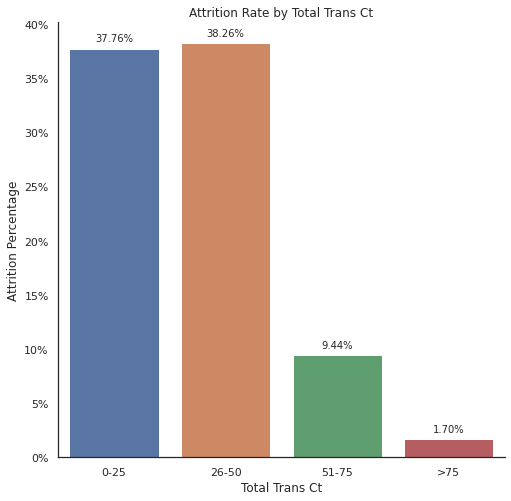

Total Trans Ct


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Total_Trans_Ct,,,,
Less than 60,3936,1377,2559,34.98
60 or more,6191,250,5941,4.04


<Figure size 288x576 with 0 Axes>

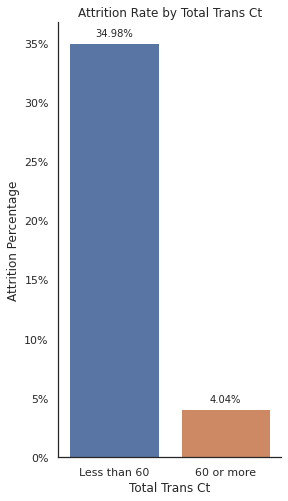

Total Trans Ct

Z-Test Result:
The p-value for 'Total Trans Ct' is 0.000e+00, therefore we can REJECT the null hypothesis.

Mean:
The average 'Total Trans Ct' for Existing Customers is 68.67.
The average 'Total Trans Ct' for Attrited Customers is 44.93.

T-Test Result:
The p-value for 'Total Trans Ct' is 0.000e+00, therefore we can REJECT the null hypothesis.


In [43]:
# Total_Trans_Ct
### total number of transactions over the past 12 months


##################################################
## DEFINE
### column name being references
column_name = 'Total_Trans_Ct'

### GROUPS for 3+ groups
group_bins = [-np.inf,
              26,
              51,
              76,
              np.inf]
group_labels = ['0-25',
                '26-50',
                '51-75',
                '>75']

### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = 60
value2 = 60
group_bins2 = [-np.inf,
               59,
               np.inf]
#### names for groups
group_labels2 = ['Less than 60', 
                 '60 or more']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] < value1]
Group_B = df_cc.loc[df_cc[colname()] >= value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



##################################################
##################################################
## PIVOT TABLE
### 3+ GROUPS


## CREATE
### pivot table
pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
## MOVE 
### column
cols = pv.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv = pv.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv)



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(8, 8))
ay, fig = plt.subplots(figsize=(8, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Total_Trans_Ct = pv
## DEFINE
### dataframe for concatented range table
concat_Total_Trans_Ct = df

In [44]:
# Confidence Interval

## PRINT
print('CONFIDENCE INTERVAL')


##################################################
## CALCULATE
### sample size, sum of attrition, rate of attrition
a_n = Group_A.shape[0]
b_n = Group_B.shape[0]
a_sum_attrition = Group_A.loc[Group_A[colname()] < value1]
b_sum_attrition = Group_B.loc[Group_B[colname()] >= value2]
a_sum_attrition = Group_A['Attrition_Status'].sum()
b_sum_attrition = Group_B['Attrition_Status'].sum()
a_rate = (a_sum_attrition / a_n)
b_rate = (b_sum_attrition / b_n)
### ROUNDING
a_rate_rnd = round(a_rate * 100, 2)
b_rate_rnd = round(b_rate * 100, 2)


## PRINT CONFIRMATION
print('')
print('Sample Size A: ' + str('{:,}'.format(a_n)))
print('Sample Size B: ' + str('{:,}'.format(b_n)))
print('Sum of Attrition A: ' + str('{:,}'.format(a_sum_attrition)))
print('Sum of Attrition B: ' + str('{:,}'.format(b_sum_attrition)))
print('Attrition Rate A: ' + str(a_rate_rnd) + '%')
print('Attrition Rate B: ' + str(b_rate_rnd) + '%')



##################################################
## CALCULATE
### proportion difference, pooled sample proportion, standard error of difference, and z-statistic
prop_diff = a_rate - b_rate
pool_samp_prop = (a_sum_attrition + b_sum_attrition) / (a_n + b_n)
stand_err_diff = math.sqrt(((a_rate * (1 - a_rate)) / a_n) +((b_rate * (1 - b_rate)) / b_n))
z_stat = prop_diff / stand_err_diff
### ROUNDING
prop_diff_rnd = round(prop_diff * 100, 2)
pool_samp_prop_rnd = round(pool_samp_prop, 4)
stand_err_diff_rnd = round(stand_err_diff, 4)
z_stat_rnd = round(z_stat, 4)


## PRINT CONFIRMATION
print('')
print('Proportion Difference: ' + str(prop_diff_rnd) + '%')
print('Pooled Sample Proportion: ' + str(pool_samp_prop_rnd))
print('Pooled Sample Proportion: ' + str(stand_err_diff_rnd))
print('Z-statistic: ' + str(z_stat_rnd))



##################################################
## CALCULATE
### p-value, confidence interval, lower limit, and upper limit
deg_of_freedom = (a_n + b_n) - 1
p_value = stats.t.sf(abs(z_stat), df=deg_of_freedom) * 2
confidence_int = stand_err_diff * 1.96
ci_lower = prop_diff - confidence_int
ci_upper = prop_diff + confidence_int
### ROUNDING
p_value_rnd = np.format_float_scientific(p_value, unique=False, precision=3)
confidence_int_rnd = round(confidence_int, 4)
ci_lower_rnd = round(ci_lower * 100, 2)
ci_upper_rnd = round(ci_upper * 100, 2)


## PRINT CONFIRMATION
print('')
print('P-value : ' + p_value_rnd)
print('Confidence Interval: ' + str(confidence_int_rnd))
print('CI Lower: ' + str(ci_lower_rnd) + '%')
print('CI Upper: ' + str(ci_upper_rnd) + '%')



##################################################
## PRINT FINAL RESULTS
print('\n')
print('Result:')
print('The difference in attrition rate for \'{}\' at the 95% confidence interval is between {}% and {}%.'.format(colname().replace('_',' '), ci_lower_rnd, ci_upper_rnd))

CONFIDENCE INTERVAL

Sample Size A: 3,936
Sample Size B: 6,191
Sum of Attrition A: 1,377
Sum of Attrition B: 250
Attrition Rate A: 34.98%
Attrition Rate B: 4.04%

Proportion Difference: 30.95%
Pooled Sample Proportion: 0.1607
Pooled Sample Proportion: 0.008
Z-statistic: 38.669

P-value : 3.115e-305
Confidence Interval: 0.0157
CI Lower: 29.38%
CI Upper: 32.52%


Result:
The difference in attrition rate for 'Total Trans Ct' at the 95% confidence interval is between 29.38% and 32.52%.


#### Total_Ct_Chng_Q4_Q1

In [45]:
# PREVIEW DATA

## DEFINE
column_name = 'Total_Ct_Chng_Q4_Q1'
no_bins = 4


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Total_Ct_Chng_Q4_Q1,,,,
"(-0.00371, 0.928]",8922,1541,7381,17.27
"(0.928, 1.857]",1164,84,1080,7.22
"(1.857, 2.786]",34,2,32,5.88
"(2.786, 3.714]",7,0,7,0.00


Total Ct Chng Q4 Q1


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Total_Ct_Chng_Q4_Q1,,,,
Negative Change,9293,1568,7725,16.87
Positive Change,834,59,775,7.07


<Figure size 288x576 with 0 Axes>

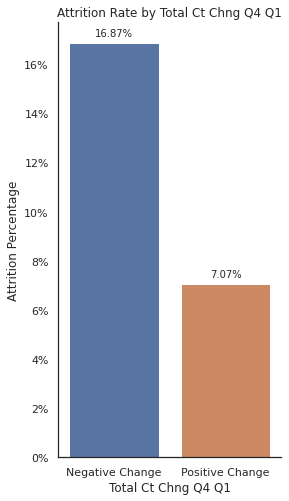

Total Ct Chng Q4 Q1

Z-Test Result:
The p-value for 'Total Ct Chng Q4 Q1' is 1.352e-13, therefore we can REJECT the null hypothesis.

Mean:
The average 'Total Ct Chng Q4 Q1' for Existing Customers is 0.74.
The average 'Total Ct Chng Q4 Q1' for Attrited Customers is 0.55.

T-Test Result:
The p-value for 'Total Ct Chng Q4 Q1' is 1.648e-195, therefore we can REJECT the null hypothesis.


In [46]:
# Total_Ct_Chng_Q4_Q1
### change in count of charges from quarter 1 to quarter 4


##################################################
## DEFINE
### column name being references
column_name = 'Total_Ct_Chng_Q4_Q1'

### GROUPS for 3+ groups
group_bins = [-np.inf,
              .99,
              np.inf]
group_labels = ['Negative Change',
                'Positive Change']

### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = .99
value2 = .99
group_bins2 = [-np.inf,
               .99,
               np.inf]
#### names for groups
group_labels2 = ['Negative Change', 
                 'Positive Change']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] < value1]
Group_B = df_cc.loc[df_cc[colname()] >= value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



# ##################################################
# ##################################################
# ## PIVOT TABLE
# ### 3+ GROUPS


# ## CREATE
# ### pivot table
# pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# # ## SORT (IF NEEDED)
# # ### rows
# # pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

# ## RENAME 
# ### 'Attrited Customer' and 'Existing Customer'
# pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
#                                  'Existing Customer': 'Existing_Customers'})

# ## ADD 
# ### column 'Total_Customers'
# pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
# ## MOVE 
# ### column
# cols = pv.columns.tolist() # list of columns
# cols.insert(0, cols.pop(cols.index('Total_Customers')))
# pv = pv.reindex(columns = cols)

# ## ADD 
# ### column 'Attrition_Percent;
# pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


# ## PRINT pivot table
# print(colname().replace('_',' '))
# display(pv)



# ##################################################
# # BAR PLOT
# ## 3+ GROUPS


# ## SETTINGS
# ### 
# plotsize = plt.figure(figsize=(4, 8))
# ay, fig = plt.subplots(figsize=(4, 8))   
# sns.set_style("white")

# ## CREATE
# ### bar plot
# bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
# plt.xlabel(colname().replace('_',' '))
# plt.ylabel('Attrition Percentage')
# plt.title('Attrition Rate by ' + colname().replace('_',' '))
# sns.despine()

# ## FORMAT
# ### bar plot
# for p in bplot.patches:
#   bplot.annotate('{:.2f}%'.format(p.get_height()), 
#                  (p.get_x() + p.get_width() / 2., p.get_height()), 
#                  va = 'center', 
#                  xytext = (0, 10), 
#                  textcoords = 'offset points',
#                  ha = 'center')

# y = 'Attrition Percentage'
# ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
# bplot.set_yticklabels(ylabels)
# bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

# ## PRINT
# ### bar plot
# plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Total_Ct_Chng_Q4_Q1 = pv
## DEFINE
### dataframe for concatented range table
concat_Total_Ct_Chng_Q4_Q1 = df

#### Avg_Utilization_Ratio

In [47]:
# PREVIEW DATA

## DEFINE
column_name = 'Avg_Utilization_Ratio'
no_bins = 4


## GROUPING
ctab_groups = pd.cut(df_cc[colname()], 
                       bins=no_bins)
## CREATE crosstab
ctab_preview = pd.crosstab(ctab_groups, df_cc['Attrition_Flag'])
## CALCULATE total customers by category
ctab_preview['Total_Customers'] = (ctab_preview['Attrited Customer'] + 
                                      ctab_preview['Existing Customer'])
## MOVE column total customers by category
cols = ctab_preview.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
ctab_preview = ctab_preview.reindex(columns = cols)
## CALCULATE attrition rate
ctab_preview['Attrition_Percent'] = round(((ctab_preview['Attrited Customer'] / 
                                               ctab_preview['Total_Customers']) * 100), 2)
## PRINT
display(ctab_preview)

Attrition_Flag,Total_Customers,Attrited Customer,Existing Customer,Attrition_Percent
Avg_Utilization_Ratio,,,,
"(-0.000999, 0.25]",5822,1232,4590,21.16
"(0.25, 0.5]",1754,167,1587,9.52
"(0.5, 0.749]",1799,110,1689,6.11
"(0.749, 0.999]",752,118,634,15.69


Avg Utilization Ratio


Attrition_Flag,Total_Customers,Attrited_Customers,Existing_Customers,Attrition_Percent
Avg_Utilization_Ratio,,,,
Less than 25%,5830,1233,4597,21.15
More than 25%,4297,394,3903,9.17


<Figure size 288x576 with 0 Axes>

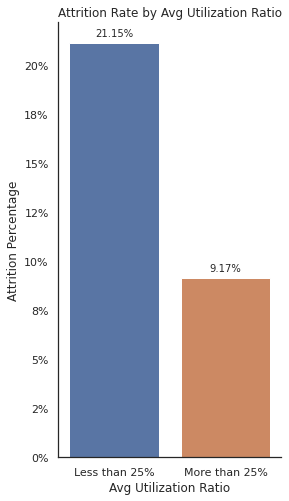

Avg Utilization Ratio

Z-Test Result:
The p-value for 'Avg Utilization Ratio' is 8.158e-61, therefore we can REJECT the null hypothesis.

Mean:
The average 'Avg Utilization Ratio' for Existing Customers is 0.30.
The average 'Avg Utilization Ratio' for Attrited Customers is 0.16.

T-Test Result:
The p-value for 'Avg Utilization Ratio' is 3.358e-73, therefore we can REJECT the null hypothesis.


In [48]:
# Avg_Utilization_Ratio
### change in count of charges from quarter 1 to quarter 4


##################################################
## DEFINE
### column name being references
column_name = 'Avg_Utilization_Ratio'

### GROUPS for 3+ groups
group_bins = [-np.inf,
              .25,
              np.inf]
group_labels = ['Negative Change',
                'Positive Change']

### TESTING GROUPS (2 groups)
#### values being used to divide groups
value1 = .25
value2 = .25
group_bins2 = [-np.inf,
               .25,
               np.inf]
#### names for groups
group_labels2 = ['Less than 25%', 
                 'More than 25%']



############################################################
########################## DEFINE ##########################
############################################################
### define Pivot Table and DataFrame name at end of cell ###
############################################################



##################################################
## CREATE (IF NEEDED)
### groups for 3+ groups
groups = pd.cut(df_cc[colname()], 
                   bins=group_bins, 
                   labels=group_labels)

## CREATE
### testing groups
Group_A = df_cc.loc[df_cc[colname()] < value1]
Group_B = df_cc.loc[df_cc[colname()] >= value2]

groups2 = pd.cut(df_cc[colname()], 
                    bins=group_bins2, 
                    labels=group_labels2)



# ##################################################
# ##################################################
# ## PIVOT TABLE
# ### 3+ GROUPS


# ## CREATE
# ### pivot table
# pv = df_cc.groupby(groups)['Attrition_Flag'].value_counts().unstack(level=1)

# # ## SORT (IF NEEDED)
# # ### rows
# # pv = pv.reindex(pv.sort_values(by=groups, ascending=False).index)

# ## RENAME 
# ### 'Attrited Customer' and 'Existing Customer'
# pv = pv.rename(columns={'Attrited Customer': 'Attrited_Customers', 
#                                  'Existing Customer': 'Existing_Customers'})

# ## ADD 
# ### column 'Total_Customers'
# pv['Total_Customers'] = pv['Attrited_Customers'] + pv['Existing_Customers']
# ## MOVE 
# ### column
# cols = pv.columns.tolist() # list of columns
# cols.insert(0, cols.pop(cols.index('Total_Customers')))
# pv = pv.reindex(columns = cols)

# ## ADD 
# ### column 'Attrition_Percent;
# pv['Attrition_Percent'] = round((pv['Attrited_Customers'] / pv['Total_Customers']) * 100, 2)


# ## PRINT pivot table
# print(colname().replace('_',' '))
# display(pv)



# ##################################################
# # BAR PLOT
# ## 3+ GROUPS


# ## SETTINGS
# ### 
# plotsize = plt.figure(figsize=(8, 8))
# ay, fig = plt.subplots(figsize=(8, 8))   
# sns.set_style("white")

# ## CREATE
# ### bar plot
# bplot = sns.barplot(x=pv.index, y="Attrition_Percent", data=pv)
# plt.xlabel(colname().replace('_',' '))
# plt.ylabel('Attrition Percentage')
# plt.title('Attrition Rate by ' + colname().replace('_',' '))
# sns.despine()

# ## FORMAT
# ### bar plot
# for p in bplot.patches:
#   bplot.annotate('{:.2f}%'.format(p.get_height()), 
#                  (p.get_x() + p.get_width() / 2., p.get_height()), 
#                  va = 'center', 
#                  xytext = (0, 10), 
#                  textcoords = 'offset points',
#                  ha = 'center')

# y = 'Attrition Percentage'
# ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
# bplot.set_yticklabels(ylabels)
# bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

# ## PRINT
# ### bar plot
# plt.show()



##################################################
##################################################
## PIVOT TABLE
### 2 GROUPS


## CREATE
### pivot table
pv2 = df_cc.groupby(groups2)['Attrition_Flag'].value_counts().unstack(level=1)

# ## SORT (IF NEEDED)
# ### rows
# pv2 = pv2.reindex(pv2.sort_values(by=groups2, ascending=False).index)

## RENAME 
### 'Attrited Customer' and 'Existing Customer'
pv2 = pv2.rename(columns={'Attrited Customer': 'Attrited_Customers', 
                                 'Existing Customer': 'Existing_Customers'})

## ADD 
### column 'Total_Customers'
pv2['Total_Customers'] = pv2['Attrited_Customers'] + pv2['Existing_Customers']
## MOVE 
### column
cols = pv2.columns.tolist() # list of columns
cols.insert(0, cols.pop(cols.index('Total_Customers')))
pv2 = pv2.reindex(columns = cols)

## ADD 
### column 'Attrition_Percent;
pv2['Attrition_Percent'] = round((pv2['Attrited_Customers'] / pv2['Total_Customers']) * 100, 2)


## PRINT pivot table
print(colname().replace('_',' '))
display(pv2)



##################################################
# BAR PLOT
## 2 GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(4, 8))
ay, fig = plt.subplots(figsize=(4, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot2 = sns.barplot(x=pv2.index, y="Attrition_Percent", data=pv2)
plt.xlabel(colname().replace('_',' '))
plt.ylabel('Attrition Percentage')
plt.title('Attrition Rate by ' + colname().replace('_',' '))
sns.despine()

## FORMAT
### bar plot
for p in bplot2.patches:
  bplot2.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot2.get_yticks()]
bplot2.set_yticklabels(ylabels)


## PRINT
### bar plot
plt.show()



##################################################
## Z-TEST
### 

## CALCULATE
ztest ,pval = stests.ztest(Group_A['Attrition_Status'], 
                           x2=Group_B['Attrition_Status'], 
                           value=0,
                           alternative='two-sided')

## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print(colname().replace('_',' '))
print('')
print('Z-Test Result:')
print(result())



##################################################
## T-TEST
### 


## CALCULATE
### mean for column by Existing Customers and Attrited Customers
avg_existing = '{:.2f}'.format(round(df_cc_existing[colname()].mean(), 2))
avg_attrited = '{:.2f}'.format(round(df_cc_attrited[colname()].mean(), 2))


## CALCULATE
ttest, pval = stats.ttest_ind(df_cc_existing[colname()], df_cc_attrited[colname()])


## DEFINE FUNCTION for printing
def result():
  if pval<0.001:
      return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             np.format_float_scientific(pval,
                                                                                                                        unique=False, 
                                                                                                                        precision=3))
  elif pval<.05:
    return 'The p-value for {} is {}, therefore we can REJECT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))
  else:
      return 'The p-value for {} is {}, therefore we can ACCEPT the null hypothesis.'.format("'" + column_name.replace('_', ' ') + "'",
                                                                                             round(np.float(pval),3))


## PRINT
print('')
print('Mean:')
print('The average \'{}\' for Existing Customers is {}.'.format(column_name.replace('_'," "), avg_existing))
print('The average \'{}\' for Attrited Customers is {}.'.format(column_name.replace('_'," "), avg_attrited))
print('')
print('T-Test Result:')
print(result())



##################################################
## CONCATENATED TABLE PREP

## CONVERT
### to new dataframe with Category, Min, Max, and Range
min = pv2['Attrition_Percent'].min()
max = pv2['Attrition_Percent'].max()
range = max - min

data = {'Category': colname(), 
          'Min_Attrition_Percent': [min],
          'Max_Attrition_Percent': [max],
          'Attrition_Percent_Range': [range]
          }

df = pd.DataFrame(data, columns=['Category','Min_Attrition_Percent','Max_Attrition_Percent','Attrition_Percent_Range'])



##################################################
##################################################
## DEFINE
### pivot table for catagory
pv_Avg_Utilization_Ratio = pv
## DEFINE
### dataframe for concatented range table
concat_Avg_Utilization_Ratio = df

In [49]:
# Confidence Interval

## PRINT
print('CONFIDENCE INTERVAL')


##################################################
## CALCULATE
### sample size, sum of attrition, rate of attrition
a_n = Group_A.shape[0]
b_n = Group_B.shape[0]
a_sum_attrition = Group_A.loc[Group_A[colname()] < value1]
b_sum_attrition = Group_B.loc[Group_B[colname()] >= value2]
a_sum_attrition = Group_A['Attrition_Status'].sum()
b_sum_attrition = Group_B['Attrition_Status'].sum()
a_rate = (a_sum_attrition / a_n)
b_rate = (b_sum_attrition / b_n)
### ROUNDING
a_rate_rnd = round(a_rate * 100, 2)
b_rate_rnd = round(b_rate * 100, 2)


## PRINT CONFIRMATION
print('')
print('Sample Size A: ' + str('{:,}'.format(a_n)))
print('Sample Size B: ' + str('{:,}'.format(b_n)))
print('Sum of Attrition A: ' + str('{:,}'.format(a_sum_attrition)))
print('Sum of Attrition B: ' + str('{:,}'.format(b_sum_attrition)))
print('Attrition Rate A: ' + str(a_rate_rnd) + '%')
print('Attrition Rate B: ' + str(b_rate_rnd) + '%')



##################################################
## CALCULATE
### proportion difference, pooled sample proportion, standard error of difference, and z-statistic
prop_diff = a_rate - b_rate
pool_samp_prop = (a_sum_attrition + b_sum_attrition) / (a_n + b_n)
stand_err_diff = math.sqrt(((a_rate * (1 - a_rate)) / a_n) +((b_rate * (1 - b_rate)) / b_n))
z_stat = prop_diff / stand_err_diff
### ROUNDING
prop_diff_rnd = round(prop_diff * 100, 2)
pool_samp_prop_rnd = round(pool_samp_prop, 4)
stand_err_diff_rnd = round(stand_err_diff, 4)
z_stat_rnd = round(z_stat, 4)


## PRINT CONFIRMATION
print('')
print('Proportion Difference: ' + str(prop_diff_rnd) + '%')
print('Pooled Sample Proportion: ' + str(pool_samp_prop_rnd))
print('Pooled Sample Proportion: ' + str(stand_err_diff_rnd))
print('Z-statistic: ' + str(z_stat_rnd))



##################################################
## CALCULATE
### p-value, confidence interval, lower limit, and upper limit
deg_of_freedom = (a_n + b_n) - 1
p_value = stats.t.sf(abs(z_stat), df=deg_of_freedom) * 2
confidence_int = stand_err_diff * 1.96
ci_lower = prop_diff - confidence_int
ci_upper = prop_diff + confidence_int
### ROUNDING
p_value_rnd = np.format_float_scientific(p_value, unique=False, precision=3)
confidence_int_rnd = round(confidence_int, 4)
ci_lower_rnd = round(ci_lower * 100, 2)
ci_upper_rnd = round(ci_upper * 100, 2)


## PRINT CONFIRMATION
print('')
print('P-value : ' + p_value_rnd)
print('Confidence Interval: ' + str(confidence_int_rnd))
print('CI Lower: ' + str(ci_lower_rnd) + '%')
print('CI Upper: ' + str(ci_upper_rnd) + '%')



##################################################
## PRINT FINAL RESULTS
print('\n')
print('Result:')
print('The difference in attrition rate for \'{}\' at the 95% confidence interval is between {}% and {}%.'.format(colname().replace('_',' '), ci_lower_rnd, ci_upper_rnd))

CONFIDENCE INTERVAL

Sample Size A: 5,822
Sample Size B: 4,305
Sum of Attrition A: 1,232
Sum of Attrition B: 395
Attrition Rate A: 21.16%
Attrition Rate B: 9.18%

Proportion Difference: 11.99%
Pooled Sample Proportion: 0.1607
Pooled Sample Proportion: 0.0069
Z-statistic: 17.2976

P-value : 4.351e-66
Confidence Interval: 0.0136
CI Lower: 10.63%
CI Upper: 13.34%


Result:
The difference in attrition rate for 'Avg Utilization Ratio' at the 95% confidence interval is between 10.63% and 13.34%.


### Attrition Percentage Comparison
All attrition percentages are compiled into a single table and organized by 'Attrition_Percent_Range' descending, to determine the categories most likely to be heavily influential to attrition.

                 Category  Min_Attrition_Percent  Max_Attrition_Percent  Attrition_Percent_Range
           Total Trans Ct                   4.04                  34.98                    30.94
          Total Trans Amt                   6.39                  24.92                    18.53
      Total Revolving Bal                   8.01                  24.56                    16.55
    Contacts Count 12 Mon                  10.11                  22.17                    12.06
    Avg Utilization Ratio                   9.17                  21.15                    11.98
   Months Inactive 12 Mon                  11.18                  21.97                    10.79
 Total Relationship Count                  11.43                  21.96                    10.53
      Total Ct Chng Q4 Q1                   7.07                  16.87                     9.80
            Card Category                  16.02                  19.12                     3.10
                   Gender     

<Figure size 1008x576 with 0 Axes>

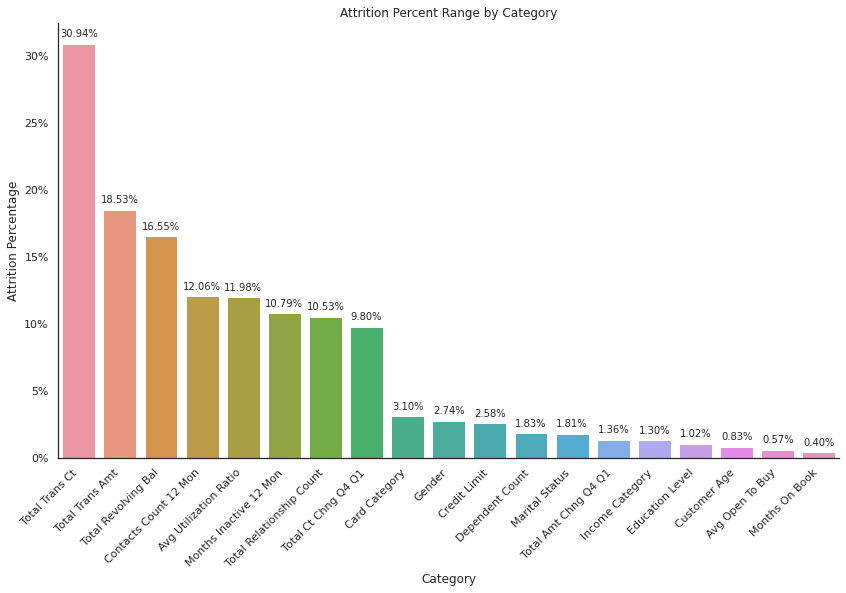



Categories with an attrition range greater than 8%

                 Category  Min_Attrition_Percent  Max_Attrition_Percent  Attrition_Percent_Range
           Total Trans Ct                   4.04                  34.98                    30.94
          Total Trans Amt                   6.39                  24.92                    18.53
      Total Revolving Bal                   8.01                  24.56                    16.55
    Contacts Count 12 Mon                  10.11                  22.17                    12.06
    Avg Utilization Ratio                   9.17                  21.15                    11.98
   Months Inactive 12 Mon                  11.18                  21.97                    10.79
 Total Relationship Count                  11.43                  21.96                    10.53
      Total Ct Chng Q4 Q1                   7.07                  16.87                     9.80




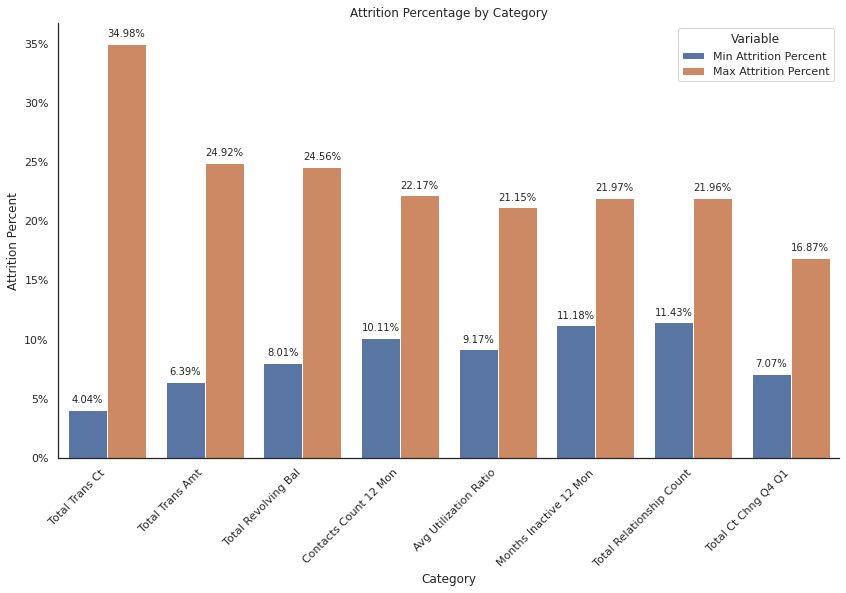

In [50]:
# LIST DataFrames
frames = [concat_Customer_Age,
          concat_Gender,
          concat_Dependent_Count,
          concat_Education_Level,
          concat_Marital_Status,
          concat_Income_Category,
          concat_Card_Category,
          concat_Months_On_Book,
          concat_Total_Relationship_Count,
          concat_Months_Inactive_12_Mon,
          concat_Contacts_Count_12_Mon,
          concat_Credit_Limit,
          concat_Total_Revolving_Bal,
          concat_Avg_Open_To_Buy,
          concat_Total_Amt_Chng_Q4_Q1,
          concat_Total_Trans_Amt,
          concat_Total_Trans_Ct,
          concat_Total_Ct_Chng_Q4_Q1,
          concat_Avg_Utilization_Ratio
          ]

## CONCAT DataFrames
df_attrition = pd.concat(frames)

## REPLACE
### replace '_' with a space for the 'Category' column
df_attrition['Category'] = df_attrition['Category'].str.replace('_',' ')

## PRINT
print(df_attrition.sort_values(by=['Attrition_Percent_Range'], ascending=False).to_string(index=False))



##################################################
# BAR PLOT
## 3+ GROUPS


## SETTINGS
### 
plotsize = plt.figure(figsize=(14, 8))
ay, fig = plt.subplots(figsize=(14, 8))   
sns.set_style("white")

## CREATE
### bar plot
bplot = sns.barplot(x='Category', 
                    y='Attrition_Percent_Range', 
                    data=df_attrition.sort_values(by=['Attrition_Percent_Range'], 
                                                  ascending=False))
plt.xlabel('Category')
plt.ylabel('Attrition Percentage')
plt.title('Attrition Percent Range by Category')
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


## PRINT
### bar plot
print('\n')
plt.show()



##################################################
##################################################
# Determining further analysis

## FILTER by attrition percent range
filter = df_attrition.loc[df_attrition['Attrition_Percent_Range'] > 8]
## SORT by attrition percent range desc
df_further_analysis = filter.sort_values(by=['Attrition_Percent_Range'], ascending=False)


## PRINT
print('\n')
print('Categories with an attrition range greater than 8%')
print('')
print(df_further_analysis.to_string(index=False))



##################################################
# BAR PLOT
## 3+ GROUPS


## REMOVE
### remove range column
df_further_analysis = df_further_analysis.drop(['Attrition_Percent_Range'], axis=1)


## FORMAT column names
df_further_analysis.columns = df_further_analysis.columns.str.replace("_", " ")


## BAR PLOT
fig, ax1 = plt.subplots(figsize=(14, 8))
tidy = df_further_analysis.melt(id_vars='Category').rename(columns=str.title)
bplot = sns.barplot(x='Category', y='Value', hue='Variable', data=tidy, ax=ax1)
plt.xlabel('Category')
plt.ylabel('Attrition Percent')
plt.title('Attrition Percentage by Category')
sns.despine()

## FORMAT
### bar plot
for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition Percentage'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)
bplot.set_xticklabels(bplot.get_xticklabels(), 
                      rotation = 45, 
                      horizontalalignment = 'right')


## PRINT
### bar plot
print('\n')
plt.show()

### Recap
The remaining list is those categories with the largest 'Attrition_Percent_Range', therefore implying influence in attrition.  Further analysis is needed on the categories remaining.  
### Conclusion
Total Transaction Count, Total Transaction Amount, and Total Revolving Balance are the most influential factors affecting credit card attrition rates. 
### Recommendations
- It is recommended that when the customer 'Total Transaction Count' over 12 months is less than 60 we should target customers with promotions.
- It is recommended that when the customer 'Total Transaction Amount' over 12 months is less than \$4,000 we should target customers with promotions. 
- It is recommended that when the customer 'Total Revolving Balance' is less than \$1,250 we should target customers with promotions.


                 Category  Attrition_Percent_Range
           Total Trans Ct                    30.94
          Total Trans Amt                    18.53
      Total Revolving Bal                    16.55
    Contacts Count 12 Mon                    12.06
    Avg Utilization Ratio                    11.98
   Months Inactive 12 Mon                    10.79
 Total Relationship Count                    10.53



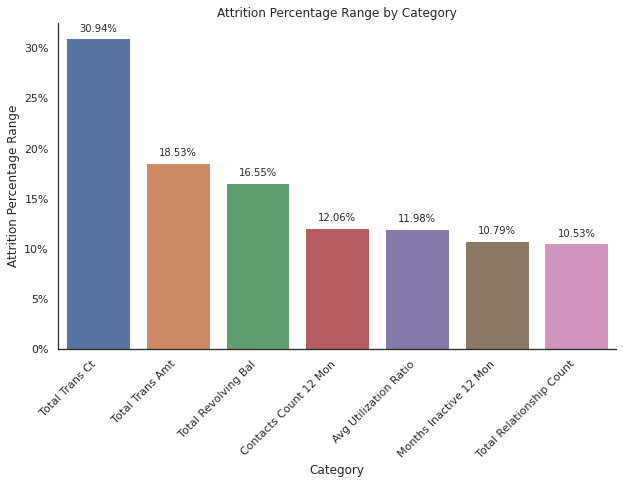



Conclusion:
Total Transaction Count, Total Transaction Amount,
and Total Revolving Balance are the most influential
factors affecting credit card attrition rates.


Recommendations:
- It is recommended that when the customer 'Total Transaction Count' over 
  12 months is less than 60 we should target customers with promotions.

- It is recommended that when the customer 'Total Transaction Amount' over 
  12 months is less than $4,000 we should target customers with promotions.

- It is recommended that when the customer 'Total Revolving Balance' is less 
  than $1,250 we should target customers with promotions.


In [51]:
# Determining further analysis

## FILTER by attrition percent range
filter = df_attrition.loc[df_attrition['Attrition_Percent_Range'] > 10]
## SORT by attrition percent range desc
df_by_cat = filter.sort_values(by=['Attrition_Percent_Range'], ascending=False)
## REPLACE '_' with ' '
df_by_cat['Category'] = df_by_cat['Category'].str.replace('_',' ')
## FILTER out index, min, and max columns
df_filtered = df_by_cat[['Category', 'Attrition_Percent_Range']].to_string(index=False)


## PRINT
print('')
print(df_filtered)



##################################################
## BOX PLOT
plt.subplots(figsize=(10, 6))

bplot = sns.barplot(x='Category', y='Attrition_Percent_Range', data=df_by_cat)
plt.title('Attrition Percentage Range by Category')
plt.ylabel('Attrition Percentage Range')
bplot.set_xticklabels(bplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
sns.despine()

for p in bplot.patches:
  bplot.annotate('{:.2f}%'.format(p.get_height()), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points',
                 ha = 'center')

y = 'Attrition_Percent_Range'
ylabels = ['{:.0f}'.format(y) + '%' for y in bplot.get_yticks()]
bplot.set_yticklabels(ylabels)


## PRINT
print('')
plt.show()
print('\n')
print('Conclusion:')
print('Total Transaction Count, Total Transaction Amount,\
\nand Total Revolving Balance are the most influential\
\nfactors affecting credit card attrition rates.')
print('\n')
print('Recommendations:')
print('- It is recommended that when the customer \'Total Transaction Count\' over \n  12 months is less than 60 we should target customers with promotions.')
print('')
print('- It is recommended that when the customer \'Total Transaction Amount\' over \n  12 months is less than $4,000 we should target customers with promotions.')
print('')
print('- It is recommended that when the customer \'Total Revolving Balance\' is less \n  than $1,250 we should target customers with promotions.')